# Final Year Project: Animal Sound Recognition using Neural Networks
#### Neil Sebbey (T00198203)
##### BSc. (Honours) Computing with Software Development | Year 4
##### Munster Technological University, Tralee, Co. Kerry

Python Libraries used:
- MatPlotLib
- Numpy
- Seaborn
- TensorFlow
- Keras
- Pandas
- Librosa
- PyDub

Dataset used: *Audio Cats and Dogs* by Marc Moreaux on Kaggle (https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs?resource=download)

Neural Network Training runs without validation data on first run, and with train-test-split method on second run over 50 epochs for MFCCs and 20 epochs for Chromagrams

## Set up Notebook environment

In [ ]:
# Install PyDub as it is not included with Colab
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Python libraries for working with files
import os
import pathlib
from pathlib import Path
from natsort import natsorted, ns

# Import libraries necessary for the project
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import IPython.display as ipd
import pandas as pd
import librosa
import librosa.display
import pydub
from pydub import AudioSegment
from pydub.utils import make_chunks

In [ ]:
# Make an input folder
input_folder = "cats_dogs"
os.mkdir(input_folder)

## Test audio file analysis

❗️**NOTE**: Before running the code below, upload the *cat_--* and *dog_barking_--* files onto the cats_dogs (input) folder that was recently created by hovering over the **cats_dogs** folder and clicking on the three dots next to the folder within Colab. Then click **Upload**. Browse the directory containing the .wav files from the downloaded dataset stored on your computer to upload.

In [ ]:
######################################################
#    Title: MEOW MEOW
#    Author: Gleb Levankov
#    Site owner/sponsor: kaggle.com
#    Date: 2021
#    Code version: Sun Dec 05 2021 00:11:54 GMT+0000
#    Availability: https://www.kaggle.com/code/gleblevankov/meow-meow
#       (Accessed 20 October 2022)
#    Modified:  Code refactored
######################################################

In [ ]:
# Load the first cat audio file
audio_data = '/content/cats_dogs/cat_1.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(246960,) 22050


In [ ]:
librosa.load(audio_data, sr=44100)
ipd.Audio(audio_data)

Google Colab uses the latest versions of Python libraries. The waveplot() method was deprecated since version 0.8.1 and it was removed since version 0.9.0. librosa.display.waveplot() is replaced by librosa.display.waveshow().

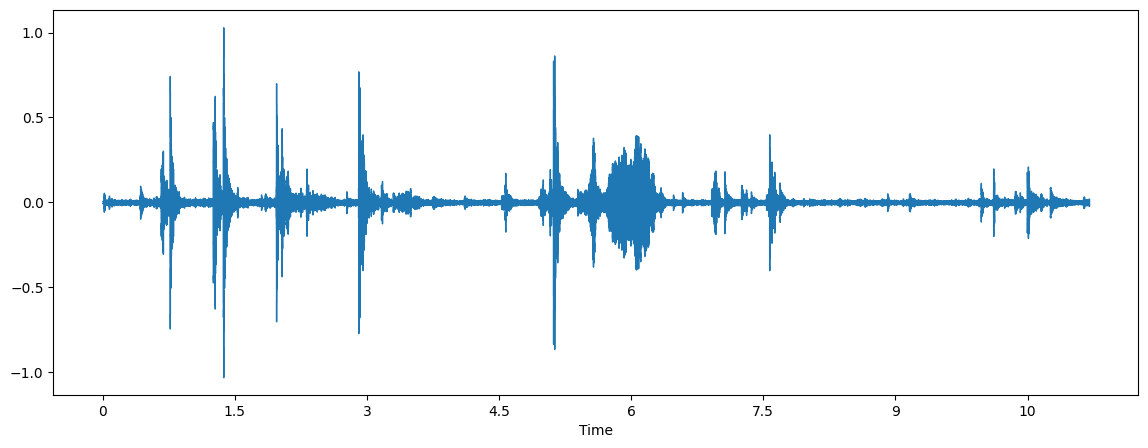

In [ ]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr);

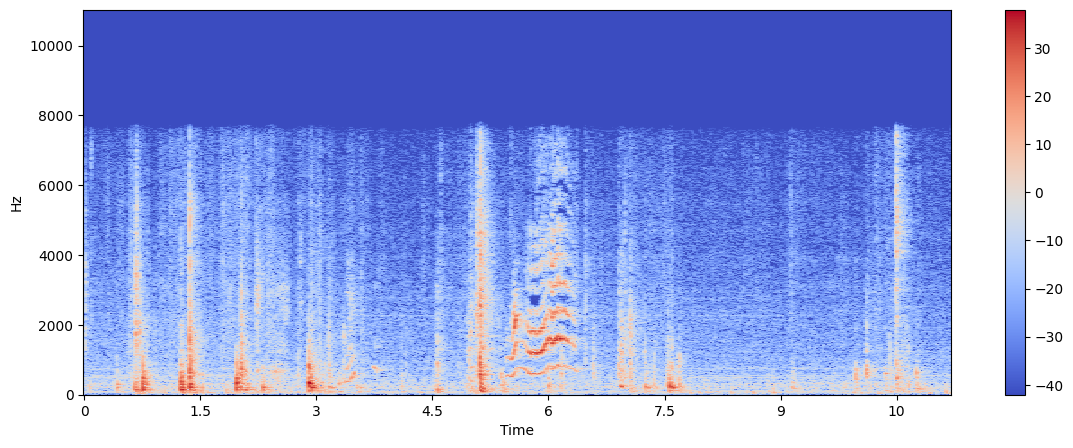

In [ ]:
# matplotlib.pyplot.pcolormesh
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

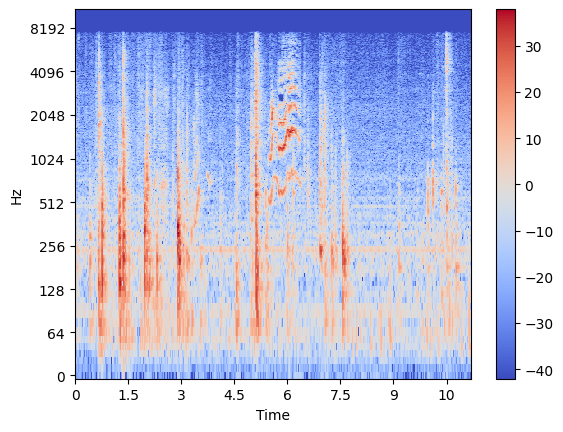

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

Feature Extraction

- Zooming:

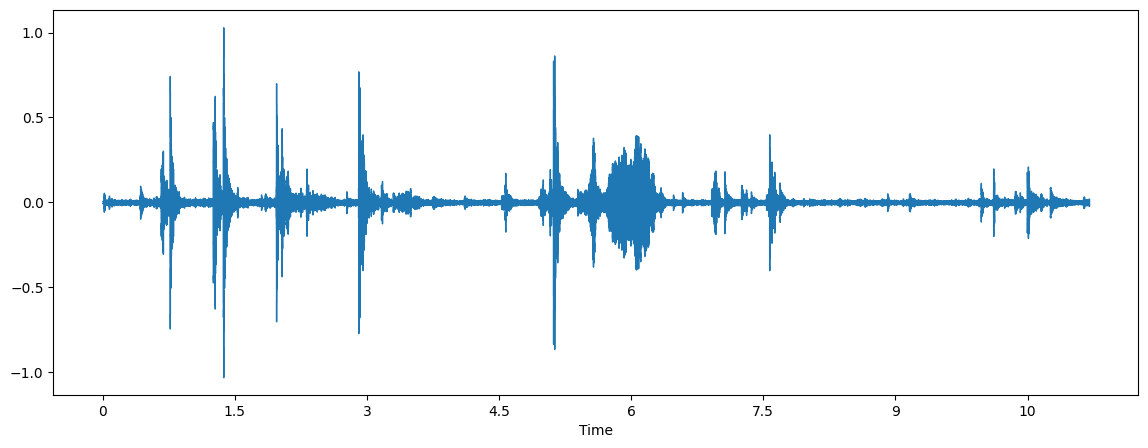

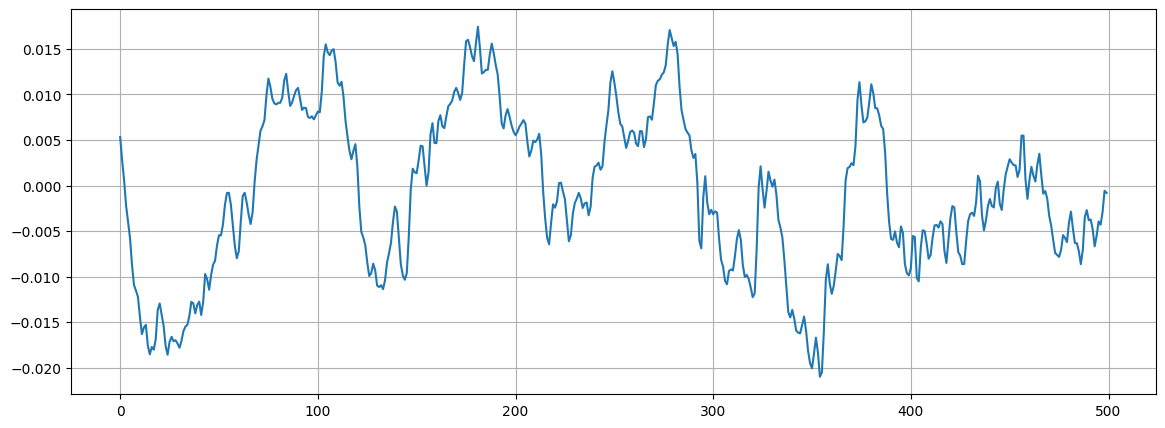

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 21000
n1 = 21500
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

- Zero Crossing:

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1])
print('Zero-Crossing value is:', sum(zero_crossings))

Zero-Crossing value is: 30


- Mel-Frequency Cepstral Coefficients (MFCCs):

Due to the updates to Librosa versions in Google Colab, the method should start with y=x instead of just x. The mfccs.shape remains the same at (20,483) in this example output based on the first cat file *cat_1.wav*.

(20, 483)


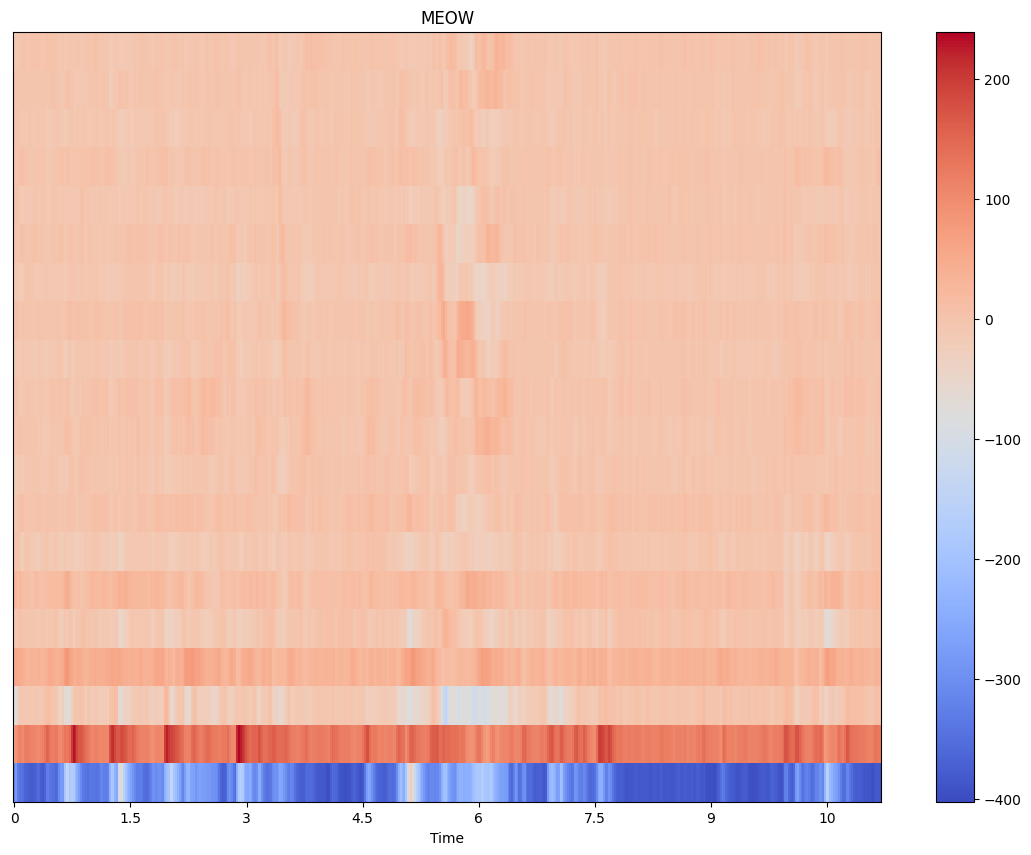

In [ ]:
# fs=10
# Librosa is updated, use y=x in the beginning of the mfcc()
mfccs = librosa.feature.mfcc(y=x,sr=sr)
print(mfccs.shape)
plt.figure(figsize=(14,10));
plt.title('MEOW')
librosa.display.specshow(mfccs,sr=sr, x_axis='time');
plt.colorbar();

- Chromatogram feature:

(12, 20581)


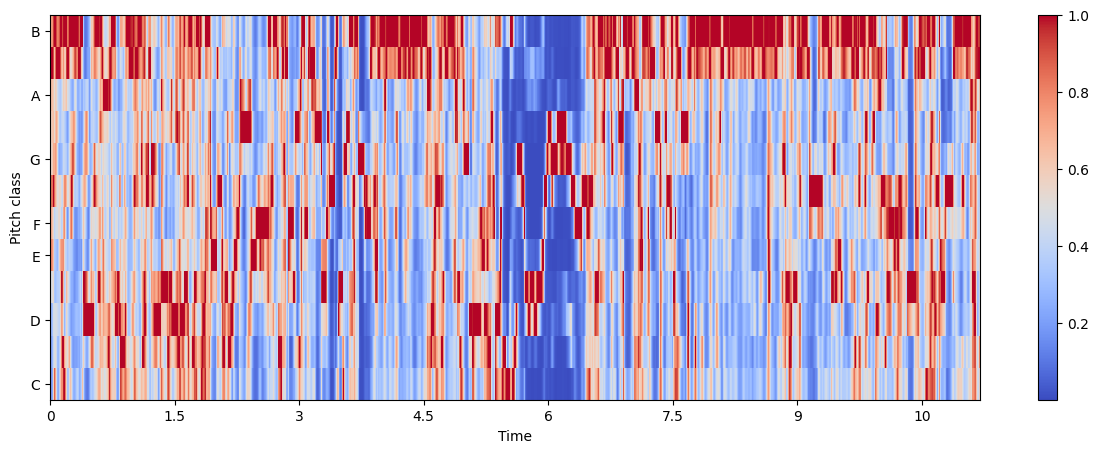

In [ ]:
hop_length=12
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar();

print(chromagram.shape)

- Melspectrogram:

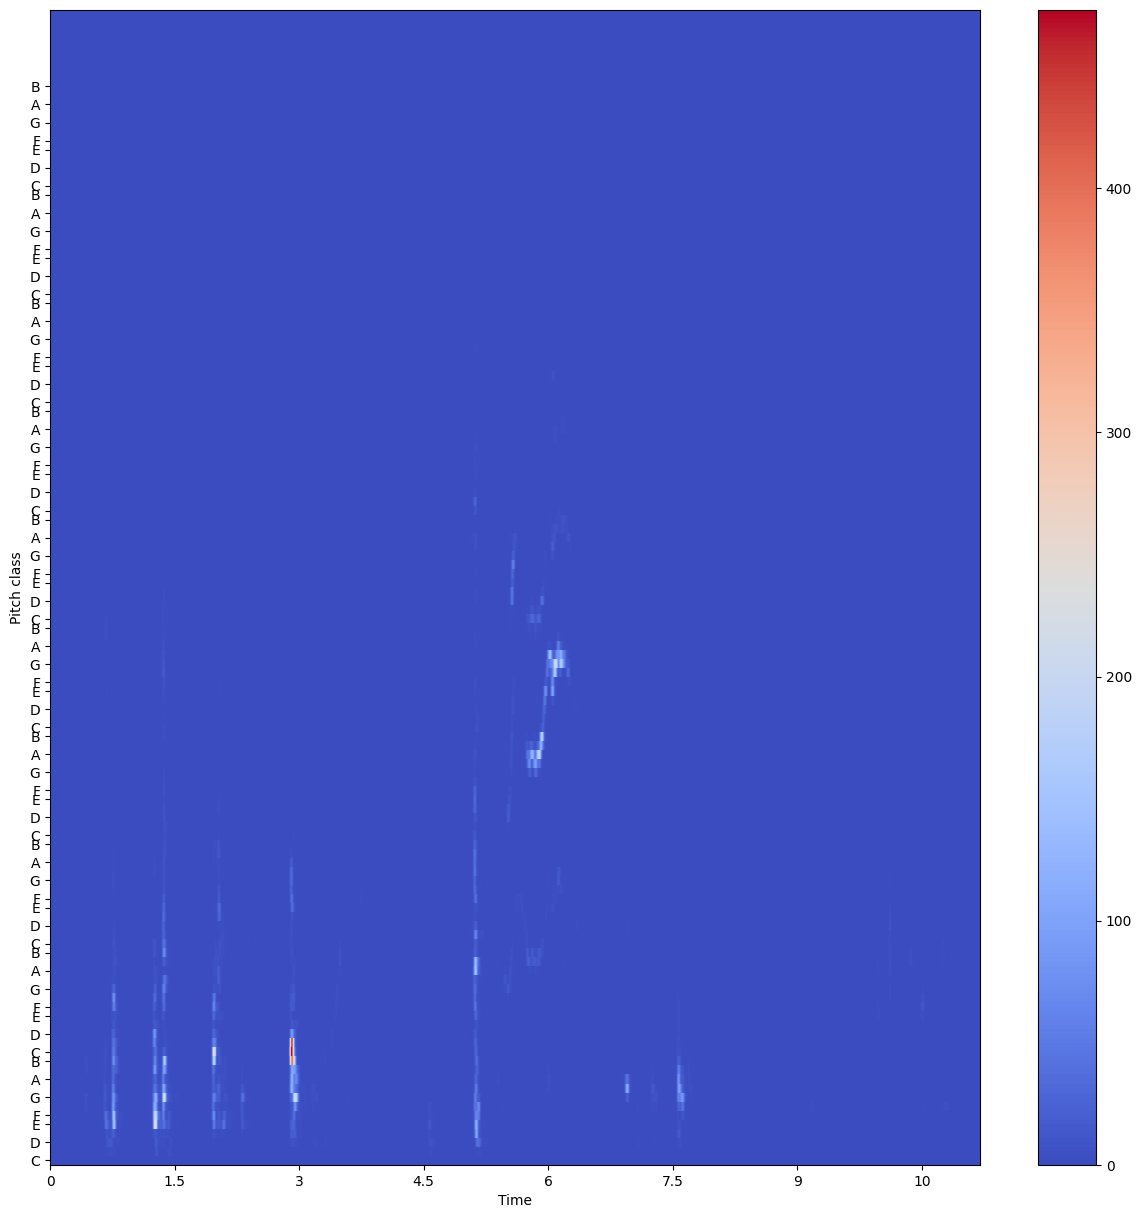

In [ ]:
hop_length=12
chromagram = librosa.feature.melspectrogram(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 15))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar();

- Chroma cens:

An error message when x is used instead of y=x inside of chroma_cens() method, *TypeError: chroma_cens() takes 0 positional arguments but 1 was given*, appears as a result of updates to the libraries included with Google Colab.

Setting the method chroma_cens() to y=x will produce the same plot result as if it was set to chroma_cens(x) in the previous versions of Librosa.

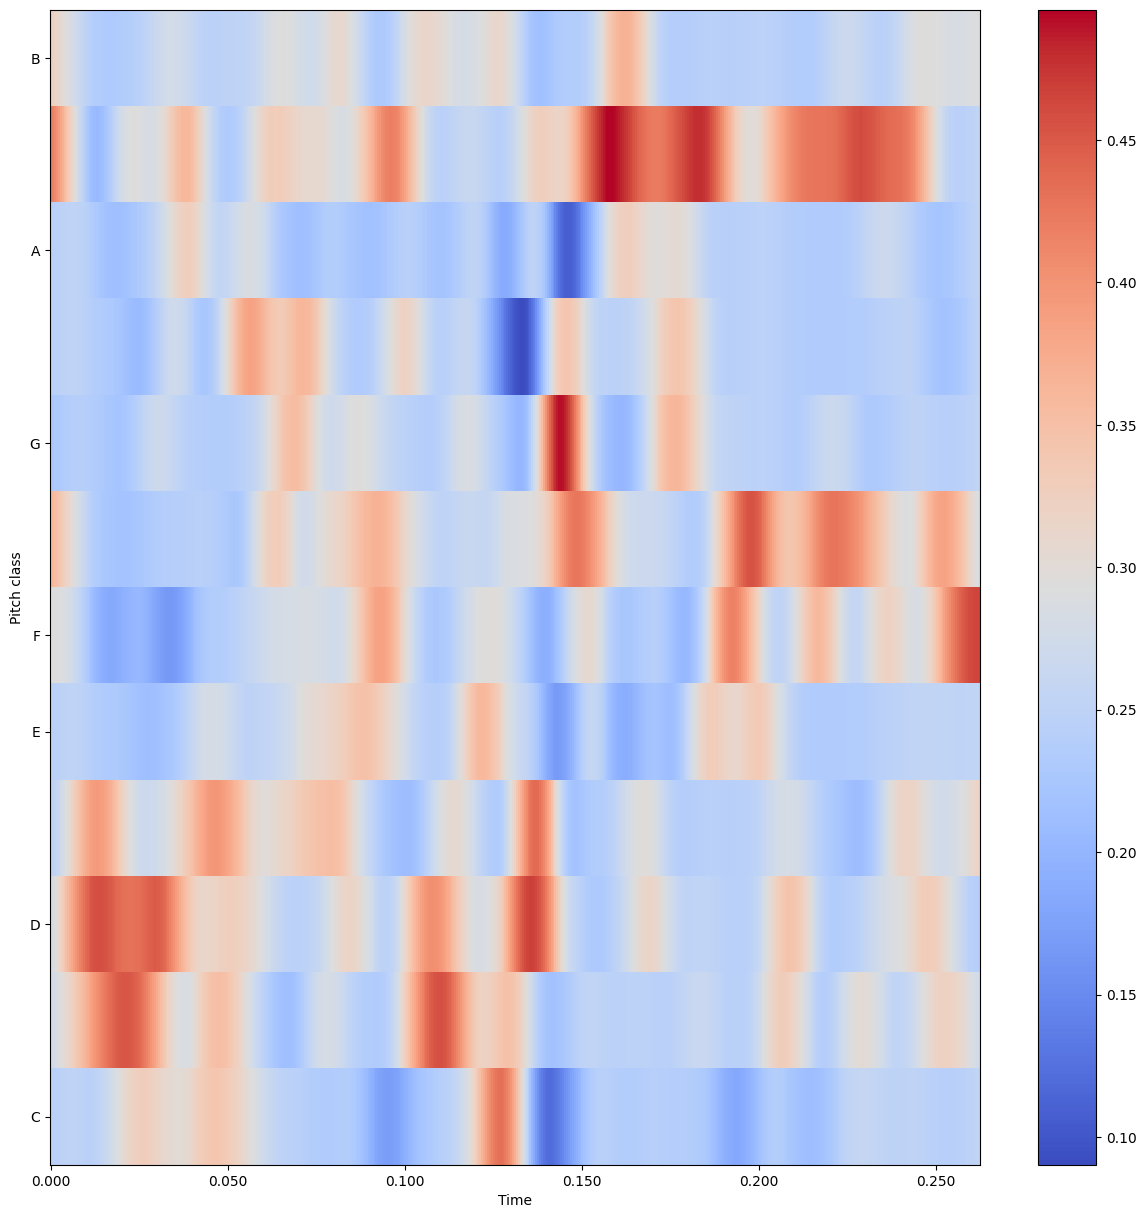

In [ ]:
# hop_length=12
chromagram = librosa.feature.chroma_cens(y=x)
plt.figure(figsize=(15, 15))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar();

In [ ]:
##########  end of refactored non-original code ##########

## Find files with a prefix

Using the os.listdir() function with startswith(). The walk() function can also be used with an if statement.

In [ ]:

######################################################
#    Title: Write a python program that finds all files with a given prefix and fill the gap
#    Author: MSeifert
#    Site owner/sponsor: stackoverflow.com
#    Date: 2016
#    Code version: edited Dec 8, 2016 at 16:58
#    Availability: https://stackoverflow.com/questions/41044333/write-a-python-program-that-finds-all-files-with-a-given-prefix-and-fill-the-gap
#       (Accessed 26 January 2023)
#    Modified:  Code refactored (Source file name changed)
######################################################
folder = "/content/cats_dogs"
cat_files = [filename for filename in os.listdir(folder) if filename.startswith('cat')]
print(cat_files)
dog_files = [filename for filename in os.listdir(folder) if filename.startswith('dog')]
print(dog_files)


['cat_132.wav', 'cat_152.wav', 'cat_123.wav', 'cat_52.wav', 'cat_167.wav', 'cat_70.wav', 'cat_16.wav', 'cat_87.wav', 'cat_72.wav', 'cat_68.wav', 'cat_151.wav', 'cat_143.wav', 'cat_103.wav', 'cat_139.wav', 'cat_125.wav', 'cat_138.wav', 'cat_119.wav', 'cat_63.wav', 'cat_112.wav', 'cat_58.wav', 'cat_158.wav', 'cat_149.wav', 'cat_51.wav', 'cat_91.wav', 'cat_41.wav', 'cat_130.wav', 'cat_19.wav', 'cat_20.wav', 'cat_62.wav', 'cat_49.wav', 'cat_155.wav', 'cat_14.wav', 'cat_34.wav', 'cat_96.wav', 'cat_73.wav', 'cat_133.wav', 'cat_22.wav', 'cat_46.wav', 'cat_57.wav', 'cat_24.wav', 'cat_25.wav', 'cat_157.wav', 'cat_78.wav', 'cat_74.wav', 'cat_90.wav', 'cat_146.wav', 'cat_116.wav', 'cat_100.wav', 'cat_39.wav', 'cat_97.wav', 'cat_45.wav', 'cat_48.wav', 'cat_94.wav', 'cat_99.wav', 'cat_95.wav', 'cat_4.wav', 'cat_148.wav', 'cat_71.wav', 'cat_64.wav', 'cat_9.wav', 'cat_77.wav', 'cat_80.wav', 'cat_18.wav', 'cat_55.wav', 'cat_33.wav', 'cat_82.wav', 'cat_76.wav', 'cat_128.wav', 'cat_2.wav', 'cat_26.wav',

Assign a variable which sets the number to 0 if the word 'cat' is found in the *cats_dogs* input folder

In [ ]:
folder = "/content/cats_dogs"
x_ = os.listdir(folder)
print(x_)
y_ = [0 if 'cat' in f else 1 for f in x_]
print(y_)

['dog_barking_98.wav', 'cat_132.wav', 'cat_152.wav', 'cat_123.wav', 'dog_barking_66.wav', 'dog_barking_56.wav', 'cat_52.wav', 'dog_barking_15.wav', 'cat_167.wav', 'dog_barking_0.wav', 'cat_70.wav', 'cat_16.wav', 'dog_barking_12.wav', 'cat_87.wav', 'dog_barking_97.wav', 'cat_72.wav', 'cat_68.wav', 'dog_barking_89.wav', 'dog_barking_77.wav', 'cat_151.wav', 'dog_barking_10.wav', 'dog_barking_108.wav', 'cat_143.wav', 'dog_barking_51.wav', 'dog_barking_59.wav', 'cat_103.wav', 'cat_139.wav', 'dog_barking_50.wav', 'cat_125.wav', 'dog_barking_28.wav', 'cat_138.wav', 'cat_119.wav', 'dog_barking_18.wav', 'cat_63.wav', 'dog_barking_16.wav', 'cat_112.wav', 'dog_barking_4.wav', 'dog_barking_27.wav', 'cat_58.wav', 'cat_158.wav', 'dog_barking_32.wav', 'dog_barking_100.wav', 'cat_149.wav', 'cat_51.wav', 'dog_barking_41.wav', 'dog_barking_101.wav', 'cat_91.wav', 'cat_41.wav', 'cat_130.wav', 'cat_19.wav', 'cat_20.wav', 'cat_62.wav', 'dog_barking_33.wav', 'cat_49.wav', 'dog_barking_14.wav', 'cat_155.wav'

Reading data of each audio file from the same directory with filenames starting with either cat or dog_barking

In [ ]:
folder = "/content/cats_dogs"
cat_files = [filename for filename in os.listdir(folder) if filename.startswith('cat')]
print(cat_files)
for file in cat_files:
  cat_file = os.path.join(folder,file)
  audio_data = cat_file
  print(cat_file)

  x , sr = librosa.load(audio_data)
  print(type(x), type(sr))
  print(x.shape, sr)
  print("\n")

dog_files = [filename for filename in os.listdir(folder) if filename.startswith('dog_barking')]
print(dog_files)
for file in dog_files:
  dog_file = os.path.join(folder,file)
  audio_data = dog_file
  print(dog_file)

  x , sr = librosa.load(audio_data)
  print(type(x), type(sr))
  print(x.shape, sr)
  print("\n")

['cat_132.wav', 'cat_152.wav', 'cat_123.wav', 'cat_52.wav', 'cat_167.wav', 'cat_70.wav', 'cat_16.wav', 'cat_87.wav', 'cat_72.wav', 'cat_68.wav', 'cat_151.wav', 'cat_143.wav', 'cat_103.wav', 'cat_139.wav', 'cat_125.wav', 'cat_138.wav', 'cat_119.wav', 'cat_63.wav', 'cat_112.wav', 'cat_58.wav', 'cat_158.wav', 'cat_149.wav', 'cat_51.wav', 'cat_91.wav', 'cat_41.wav', 'cat_130.wav', 'cat_19.wav', 'cat_20.wav', 'cat_62.wav', 'cat_49.wav', 'cat_155.wav', 'cat_14.wav', 'cat_34.wav', 'cat_96.wav', 'cat_73.wav', 'cat_133.wav', 'cat_22.wav', 'cat_46.wav', 'cat_57.wav', 'cat_24.wav', 'cat_25.wav', 'cat_157.wav', 'cat_78.wav', 'cat_74.wav', 'cat_90.wav', 'cat_146.wav', 'cat_116.wav', 'cat_100.wav', 'cat_39.wav', 'cat_97.wav', 'cat_45.wav', 'cat_48.wav', 'cat_94.wav', 'cat_99.wav', 'cat_95.wav', 'cat_4.wav', 'cat_148.wav', 'cat_71.wav', 'cat_64.wav', 'cat_9.wav', 'cat_77.wav', 'cat_80.wav', 'cat_18.wav', 'cat_55.wav', 'cat_33.wav', 'cat_82.wav', 'cat_76.wav', 'cat_128.wav', 'cat_2.wav', 'cat_26.wav',

Split text by removing the file extension (.wav) from the file name to prepare each full-length audio file for splicing to 1-second chunks.

In [ ]:
folder = "/content/cats_dogs"
cat_files = [filename for filename in os.listdir(folder) if filename.startswith('cat')]
print(cat_files)
for file in cat_files:
  cat_file = os.path.join(folder,file)
  print(cat_file)
  print(file)
  # print file name without file extension
  file_title = os.path.splitext(file)[0]
  print(file_title)
  print("\n")

dog_files = [filename for filename in os.listdir(folder) if filename.startswith('dog_barking')]
print(dog_files)
for file in dog_files:
  dog_file = os.path.join(folder,file)
  print(dog_file)
  print(file)
  # print file name without file extension
  file_title = os.path.splitext(file)[0]
  print(file_title)
  print("\n")

['cat_132.wav', 'cat_152.wav', 'cat_123.wav', 'cat_52.wav', 'cat_167.wav', 'cat_70.wav', 'cat_16.wav', 'cat_87.wav', 'cat_72.wav', 'cat_68.wav', 'cat_151.wav', 'cat_143.wav', 'cat_103.wav', 'cat_139.wav', 'cat_125.wav', 'cat_138.wav', 'cat_119.wav', 'cat_63.wav', 'cat_112.wav', 'cat_58.wav', 'cat_158.wav', 'cat_149.wav', 'cat_51.wav', 'cat_91.wav', 'cat_41.wav', 'cat_130.wav', 'cat_19.wav', 'cat_20.wav', 'cat_62.wav', 'cat_49.wav', 'cat_155.wav', 'cat_14.wav', 'cat_34.wav', 'cat_96.wav', 'cat_73.wav', 'cat_133.wav', 'cat_22.wav', 'cat_46.wav', 'cat_57.wav', 'cat_24.wav', 'cat_25.wav', 'cat_157.wav', 'cat_78.wav', 'cat_74.wav', 'cat_90.wav', 'cat_146.wav', 'cat_116.wav', 'cat_100.wav', 'cat_39.wav', 'cat_97.wav', 'cat_45.wav', 'cat_48.wav', 'cat_94.wav', 'cat_99.wav', 'cat_95.wav', 'cat_4.wav', 'cat_148.wav', 'cat_71.wav', 'cat_64.wav', 'cat_9.wav', 'cat_77.wav', 'cat_80.wav', 'cat_18.wav', 'cat_55.wav', 'cat_33.wav', 'cat_82.wav', 'cat_76.wav', 'cat_128.wav', 'cat_2.wav', 'cat_26.wav',

## Create chunks of each full-length audio file based on file name prefixes

Create an output chunk folder

In [ ]:
output_chunks = "/content/output_chunks"
os.mkdir(output_chunks)

In [ ]:
######################################################
#    Title: How to splice an audio file (wav format) into 1 sec splices in python?
#    Author: Anil_M
#    Site owner/sponsor: stackoverflow.com
#    Date: 2016
#    Code version: edited Apr 25 2016 at 23:03
#    Availability: https://stackoverflow.com/questions/36799902/how-to-splice-an-audio-file-wav-format-into-1-sec-splices-in-python 
#       (Accessed 30 November 2022)
#    Modified:  Code refactored (Source file name changed)
######################################################

- Cat

In [ ]:
folder = "/content/cats_dogs"
output_chunks = "/content/output_chunks"

cat_files = [filename for filename in os.listdir(folder) if filename.startswith('cat')]
print(cat_files)

for file in cat_files:
  cat_file = os.path.join(folder, file)
  file_title = os.path.splitext(file)[0]
  myaudio = AudioSegment.from_file(cat_file , "wav")
  ##########  start of refactored non-original code above   ##########
  chunk_length_ms = 1000 # pydub calculates in millisec
  chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

  #Export all of the individual chunks as wav files

  # Make Directory based on a single wav file for chunk processing
  print("Making directory: ", file_title, "\n")
  output_eachfile = os.path.join(output_chunks, file_title)
  os.mkdir(output_eachfile)
  os.chdir(output_eachfile)

  for i, chunk in enumerate(chunks):
      chunk_name = "chunk{0}.wav".format(i)
      print("exporting", chunk_name)
      chunk.export(chunk_name, format="wav")
  print("\n")
os.chdir('/content/')

['cat_132.wav', 'cat_152.wav', 'cat_123.wav', 'cat_52.wav', 'cat_167.wav', 'cat_70.wav', 'cat_16.wav', 'cat_87.wav', 'cat_72.wav', 'cat_68.wav', 'cat_151.wav', 'cat_143.wav', 'cat_103.wav', 'cat_139.wav', 'cat_125.wav', 'cat_138.wav', 'cat_119.wav', 'cat_63.wav', 'cat_112.wav', 'cat_58.wav', 'cat_158.wav', 'cat_149.wav', 'cat_51.wav', 'cat_91.wav', 'cat_41.wav', 'cat_130.wav', 'cat_19.wav', 'cat_20.wav', 'cat_62.wav', 'cat_49.wav', 'cat_155.wav', 'cat_14.wav', 'cat_34.wav', 'cat_96.wav', 'cat_73.wav', 'cat_133.wav', 'cat_22.wav', 'cat_46.wav', 'cat_57.wav', 'cat_24.wav', 'cat_25.wav', 'cat_157.wav', 'cat_78.wav', 'cat_74.wav', 'cat_90.wav', 'cat_146.wav', 'cat_116.wav', 'cat_100.wav', 'cat_39.wav', 'cat_97.wav', 'cat_45.wav', 'cat_48.wav', 'cat_94.wav', 'cat_99.wav', 'cat_95.wav', 'cat_4.wav', 'cat_148.wav', 'cat_71.wav', 'cat_64.wav', 'cat_9.wav', 'cat_77.wav', 'cat_80.wav', 'cat_18.wav', 'cat_55.wav', 'cat_33.wav', 'cat_82.wav', 'cat_76.wav', 'cat_128.wav', 'cat_2.wav', 'cat_26.wav',

- Dog

In [ ]:
folder = "/content/cats_dogs"
output_chunks = "/content/output_chunks"

dog_files = [filename for filename in os.listdir(folder) if filename.startswith('dog_barking')]
print(dog_files)

for file in dog_files:
  dog_file = os.path.join(folder, file)
  file_title = os.path.splitext(file)[0]
  myaudio = AudioSegment.from_file(dog_file , "wav")
  chunk_length_ms = 1000 # pydub calculates in millisec
  chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

  #Export all of the individual chunks as wav files

  # Make Directory based on a single wav file for chunk processing
  print("Making directory: ", file_title, "\n")
  output_eachfile = os.path.join(output_chunks, file_title)
  os.mkdir(output_eachfile)
  os.chdir(output_eachfile)

  for i, chunk in enumerate(chunks):
      chunk_name = "chunk{0}.wav".format(i)
      print("exporting", chunk_name)
      chunk.export(chunk_name, format="wav")
  print("\n")
  ##########  end of refactored non-original code above  ##########
os.chdir('/content/')    # Return to default working directory of Colab

['dog_barking_98.wav', 'dog_barking_66.wav', 'dog_barking_56.wav', 'dog_barking_15.wav', 'dog_barking_0.wav', 'dog_barking_12.wav', 'dog_barking_97.wav', 'dog_barking_89.wav', 'dog_barking_77.wav', 'dog_barking_10.wav', 'dog_barking_108.wav', 'dog_barking_51.wav', 'dog_barking_59.wav', 'dog_barking_50.wav', 'dog_barking_28.wav', 'dog_barking_18.wav', 'dog_barking_16.wav', 'dog_barking_4.wav', 'dog_barking_27.wav', 'dog_barking_32.wav', 'dog_barking_100.wav', 'dog_barking_41.wav', 'dog_barking_101.wav', 'dog_barking_33.wav', 'dog_barking_14.wav', 'dog_barking_17.wav', 'dog_barking_79.wav', 'dog_barking_93.wav', 'dog_barking_91.wav', 'dog_barking_43.wav', 'dog_barking_1.wav', 'dog_barking_42.wav', 'dog_barking_69.wav', 'dog_barking_85.wav', 'dog_barking_74.wav', 'dog_barking_29.wav', 'dog_barking_26.wav', 'dog_barking_60.wav', 'dog_barking_6.wav', 'dog_barking_62.wav', 'dog_barking_49.wav', 'dog_barking_107.wav', 'dog_barking_65.wav', 'dog_barking_94.wav', 'dog_barking_75.wav', 'dog_bark

## Display a list of file contents (chunks) of each output folder

Using the os.listdir() function, the two folders each contain 1-second .wav chunks of the first audio file for either cat or dog.

In [ ]:
chunkFolder = "/content/output_chunks/cat_1"
print("File path: " + chunkFolder)
chunksOut = [filename for filename in os.listdir(chunkFolder) if filename.startswith('chunk')]
chunksOut = natsorted(chunksOut, key=lambda y: y.lower())
print(chunksOut)
total_number_of_chunks = len(chunksOut)
print("The total number of chunks is " + str(total_number_of_chunks))
print("\n")

chunkFolder = "/content/output_chunks/dog_barking_1"
print("File path: " + chunkFolder)
chunksOut = [filename for filename in os.listdir(chunkFolder) if filename.startswith('chunk')]
chunksOut = natsorted(chunksOut, key=lambda y: y.lower())
print(chunksOut)
total_number_of_chunks = len(chunksOut)
print("The total number of chunks is " + str(total_number_of_chunks))
print("\n")

File path: /content/output_chunks/cat_1
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12


File path: /content/output_chunks/dog_barking_1
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12




Example: Feature Extraction of each chunk for the first cat file.

/content/output_chunks/cat_1/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk5.wav
(20, 44)
(12, 1838)




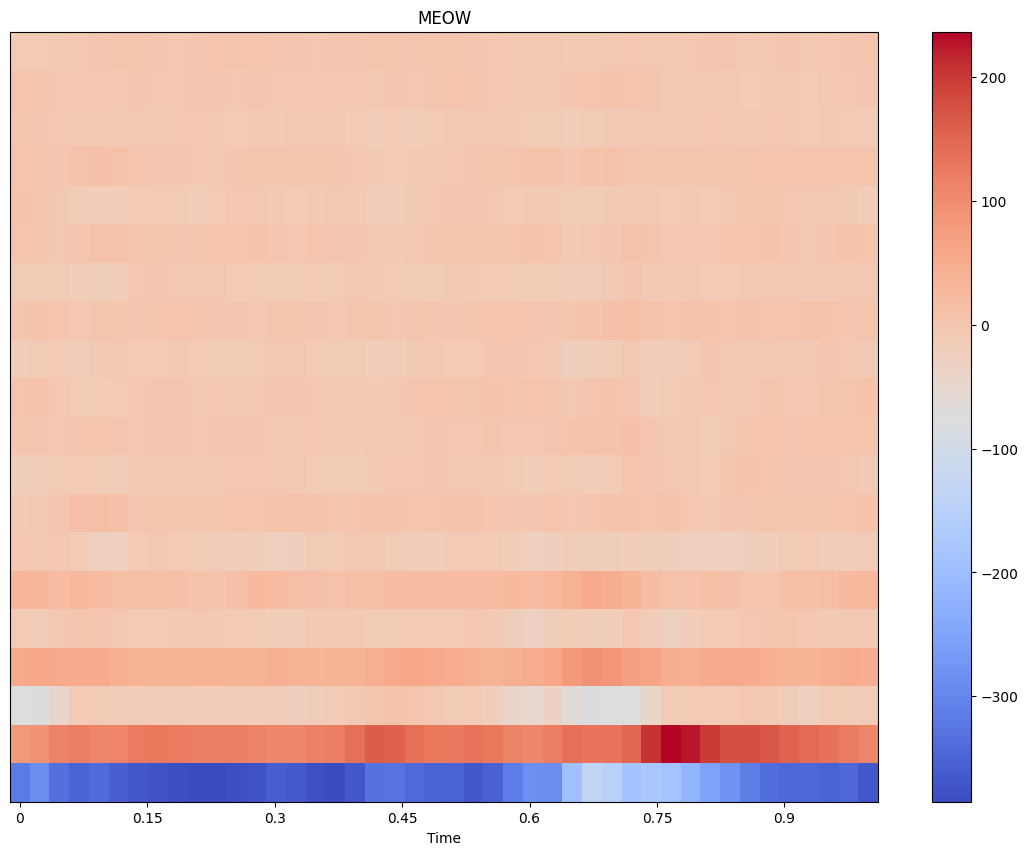

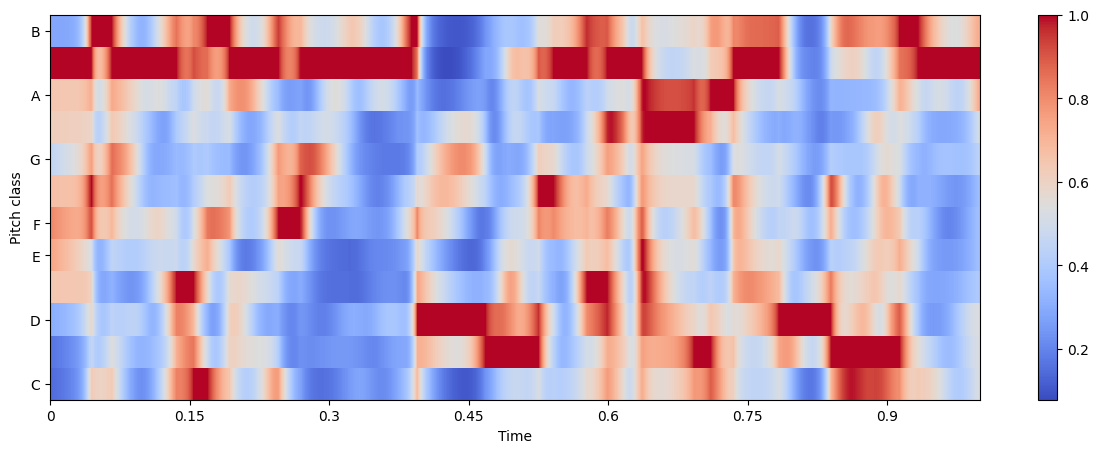

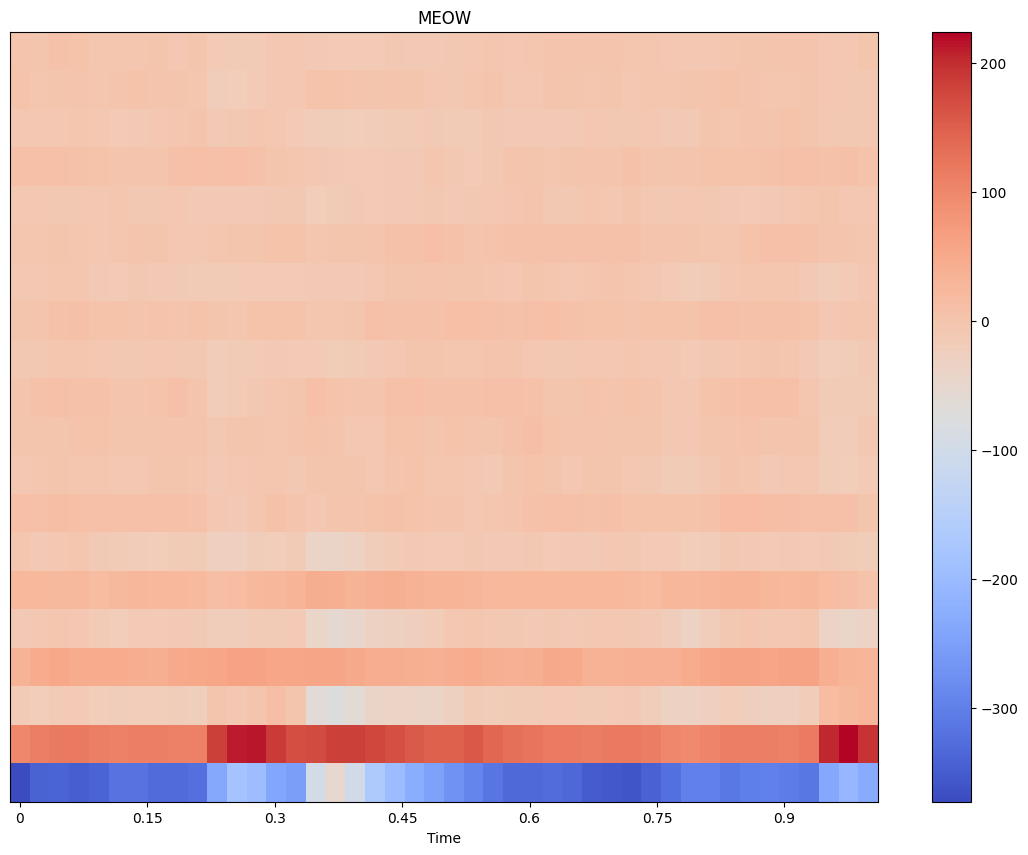

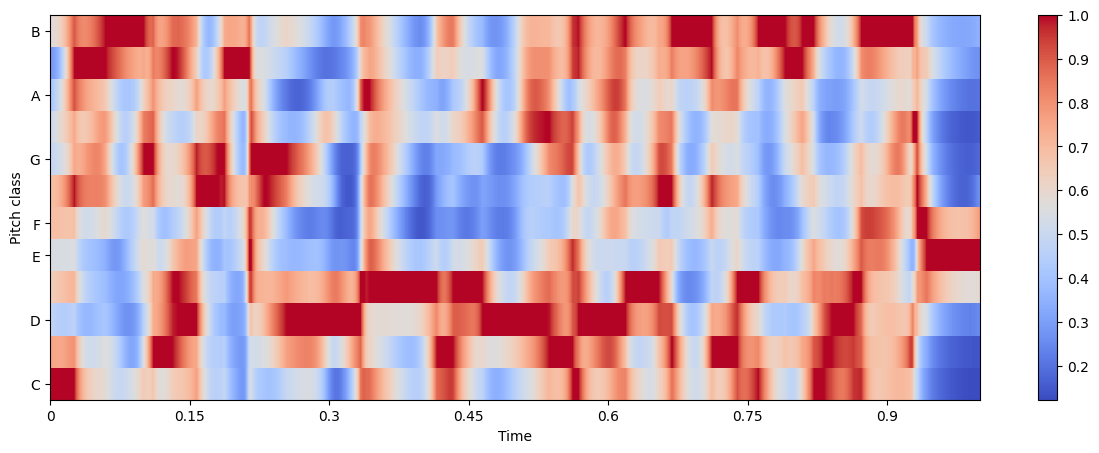

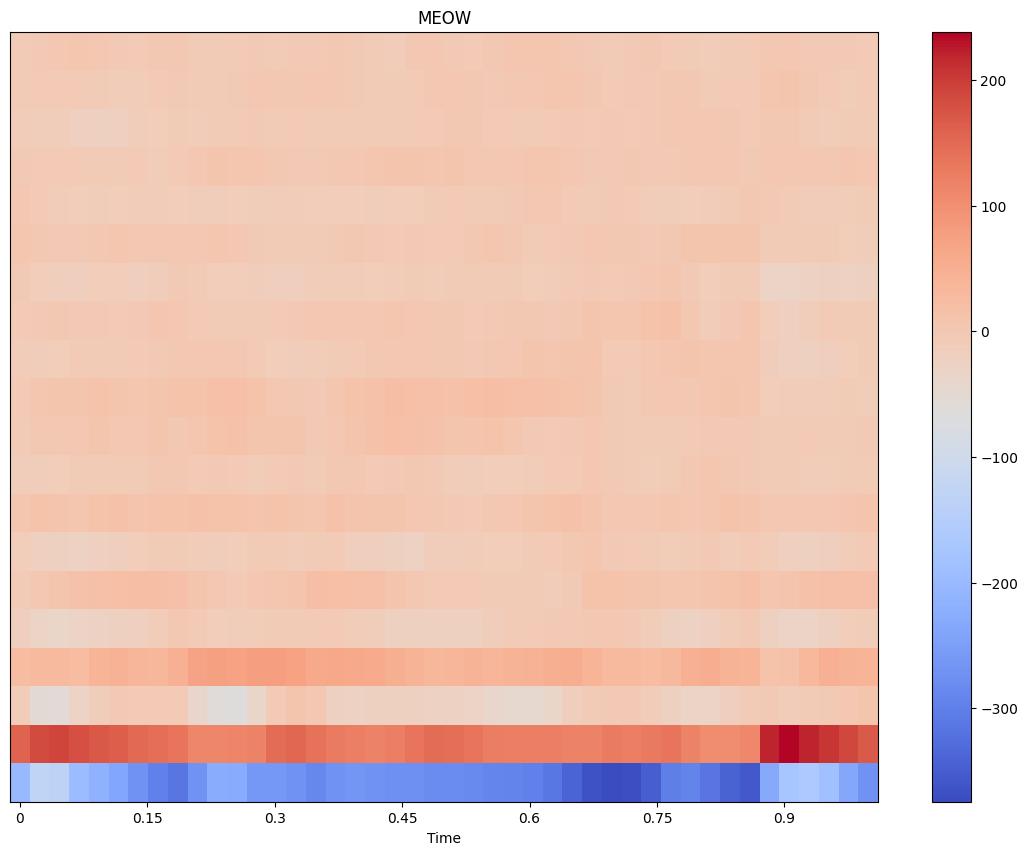

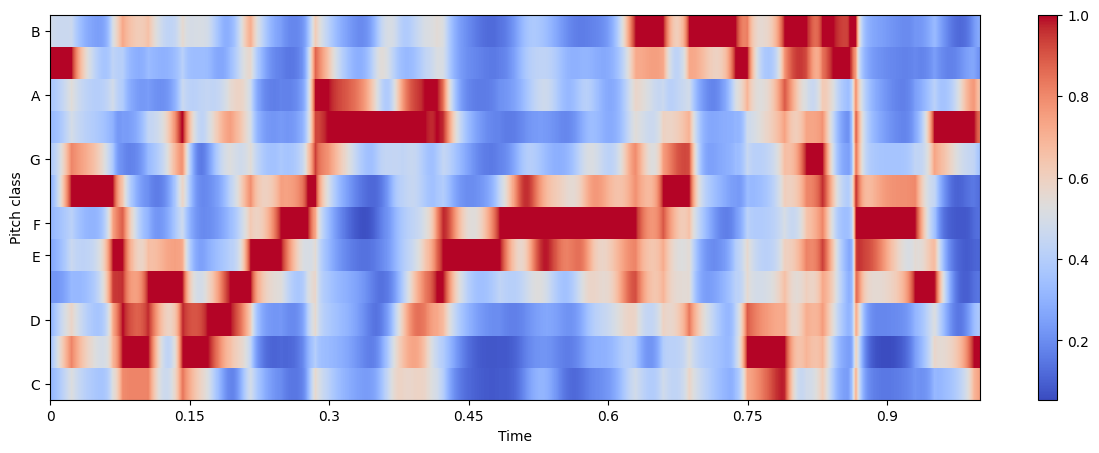

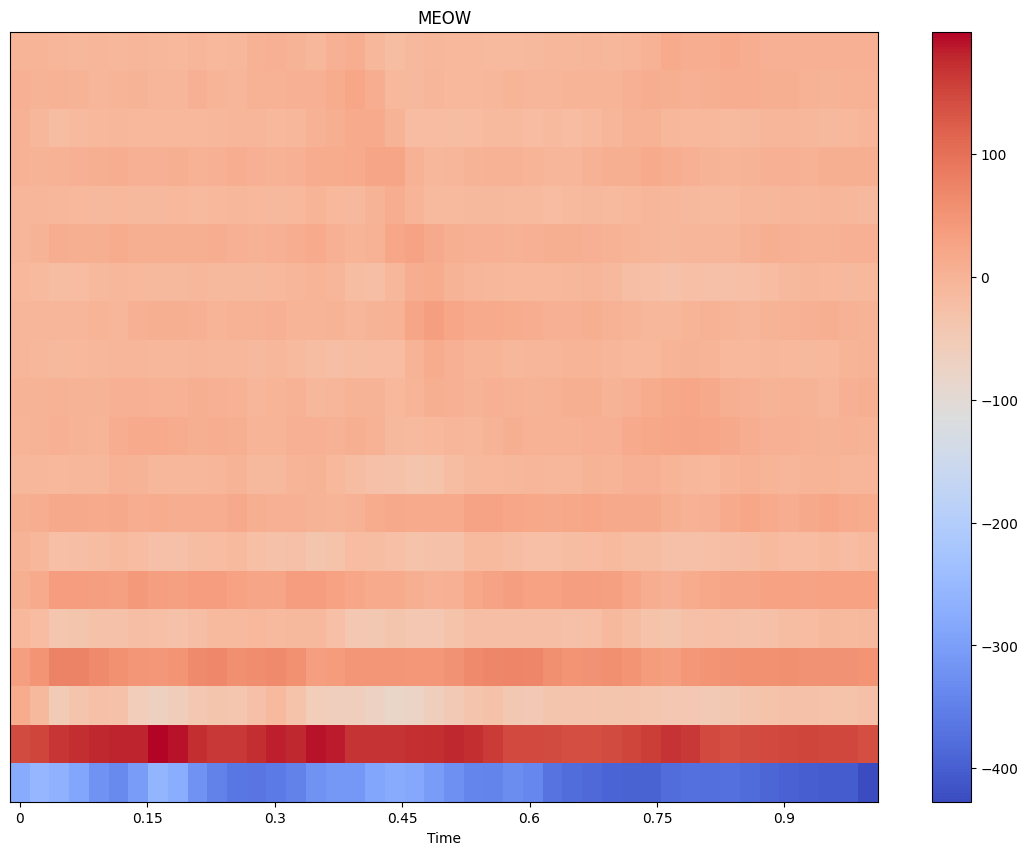

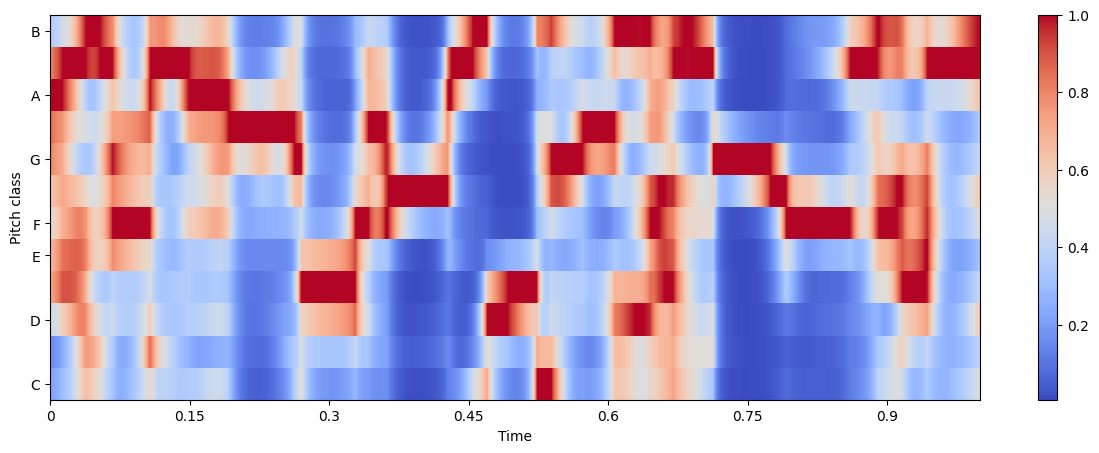

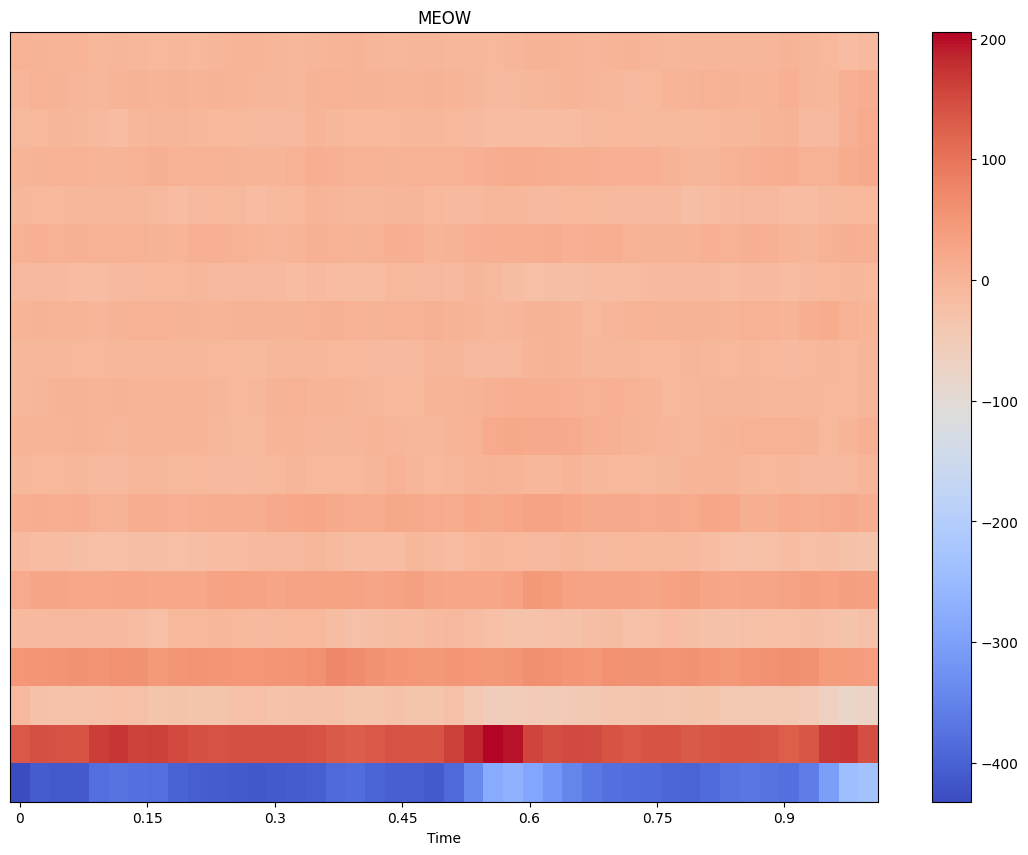

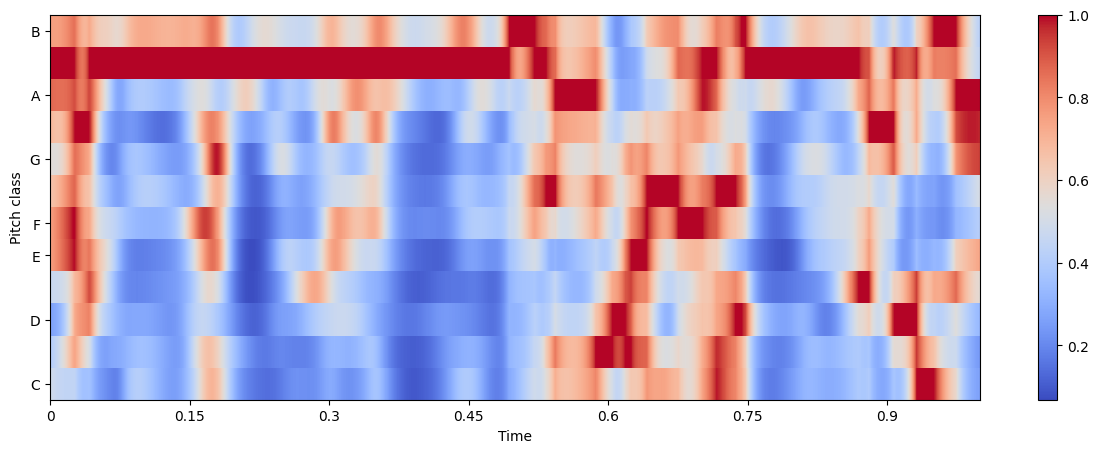

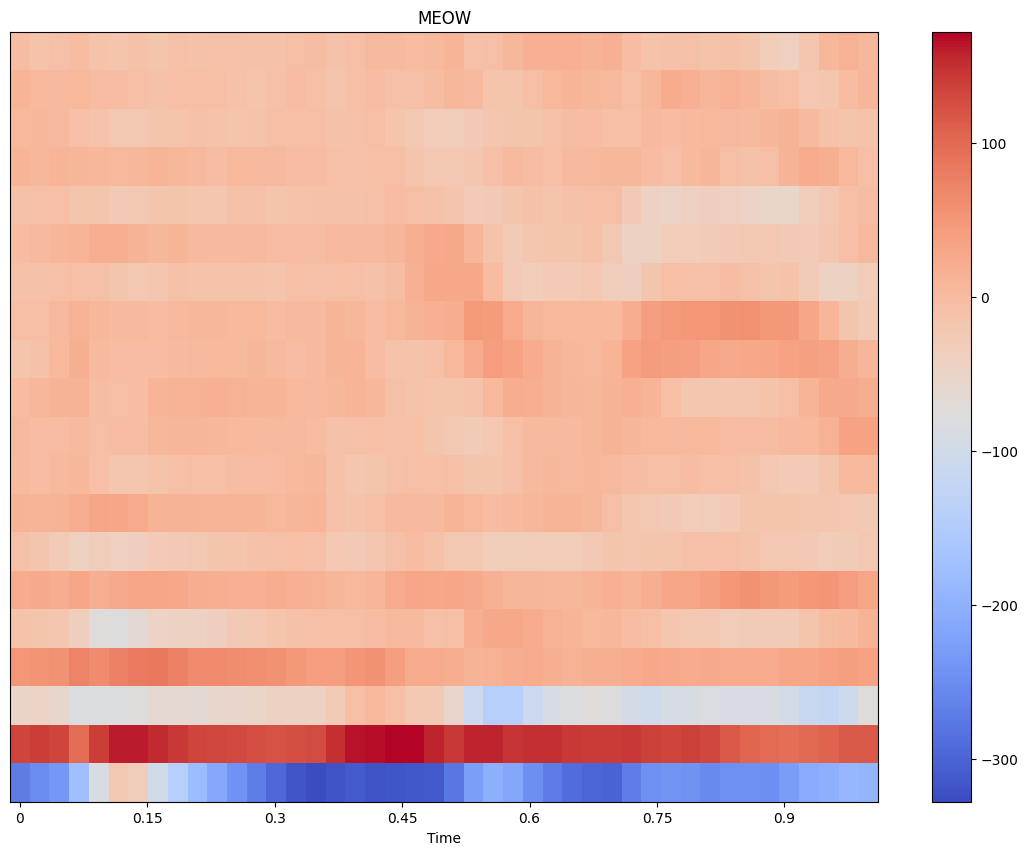

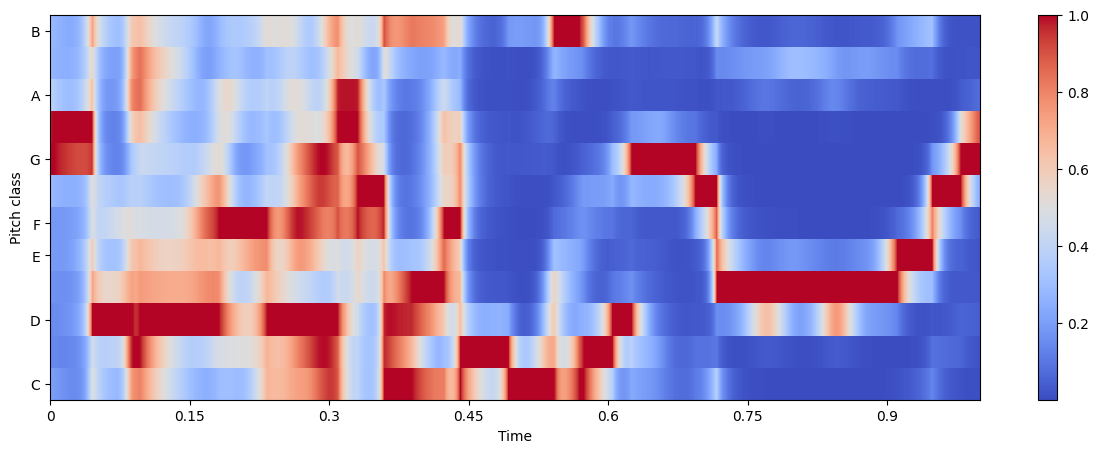

In [ ]:
output_chunks_for_file = "/content/output_chunks/cat_1"
chunksOut = [filename for filename in os.listdir(output_eachfile) if filename.startswith('chunk')]
chunksOut = natsorted(chunksOut, key=lambda y: y.lower())

for file in chunksOut:
  chunk_file = os.path.join(output_chunks_for_file,file)
  print(chunk_file)
  audio_data = chunk_file
  x , sr = librosa.load(audio_data)

  # fs=10
  mfccs = librosa.feature.mfcc(y=x,sr=sr)
  print(mfccs.shape)
  plt.figure(figsize=(14,10));
  plt.title('MEOW')
  librosa.display.specshow(mfccs,sr=sr, x_axis='time');
  plt.colorbar();

  hop_length=12
  chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
  plt.colorbar();
  print(chromagram.shape)
  print("\n")

## Create an empty data frame and store variables of each file with a for-loop os.walk() function


Create an empty data frame and verify if it exists

In [ ]:
df = pd.DataFrame(columns = ['file_title', 'class', 'mfccs', 'chromagram', 'mfcc_shape', 'chromagram_shape', 'x_total', 'y_total'])
print(df)

Empty DataFrame
Columns: [file_title, class, mfccs, chromagram, mfcc_shape, chromagram_shape, x_total, y_total]
Index: []


## Store variables of each chunk file and view data frame to confirm variables are stored

### Cat

In [ ]:
output_chunks = "/content/output_chunks/"
chunksDir = [filename for filename in os.walk(output_chunks) ]
print(chunksDir)
print("\n")
print(chunksDir[0][0])        # output is the same as 'output_chunks'
subdirs = natsorted(chunksDir[0][1], key=lambda y: y.lower())
print("Subdirectories: " + str(subdirs))

for file_title in subdirs:
  if file_title.startswith('cat'):
    print("\n")
    print(file_title)                                       # file_title to pandas dataframe called df_cat
    output_chunks_for_file = os.path.join(output_chunks,file_title)
    print(output_chunks_for_file)

    chunkList = [filename for filename in os.walk(output_chunks_for_file)]
    chunks = natsorted(chunkList[0][2], key=lambda y: y.lower())
    print(chunks)
    total_number_of_chunks = len(chunks)                    # total_number_of_chunks to pd dataframe
    print("The total number of chunks is " + str(total_number_of_chunks))
    MccF =[]
    for file in chunks:
      chunk_file = os.path.join(output_chunks_for_file,file)
      print(chunk_file)
      audio_data = chunk_file
      x , sr = librosa.load(audio_data)

      # fs=10
      mfccs = librosa.feature.mfcc(y=x,sr=sr)
      print(mfccs.shape)                                    # MFCCs to pd dataframe + the total_number_of_chunks
      mfcc_shape = mfccs.shape
      

      hop_length=12
      chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
      print(chromagram.shape)
      chromagram_shape = chromagram.shape

      # Append to dataset
      if chunk_file.endswith('chunk0.wav'):
        x_total = (total_number_of_chunks,*mfcc_shape)
        y_total = (total_number_of_chunks)
       
        df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
      print("\n")


[('/content/output_chunks/', ['dog_barking_112', 'cat_1', 'cat_71', 'cat_52', 'cat_48', 'dog_barking_75', 'cat_152', 'dog_barking_31', 'cat_125', 'dog_barking_103', 'cat_17', 'dog_barking_17', 'cat_36', 'cat_32', 'dog_barking_57', 'dog_barking_33', 'dog_barking_34', 'dog_barking_1', 'cat_122', 'cat_86', 'cat_4', 'cat_97', 'dog_barking_15', 'dog_barking_9', 'dog_barking_20', 'dog_barking_47', 'cat_20', 'cat_64', 'dog_barking_104', 'cat_7', 'dog_barking_24', 'cat_16', 'cat_51', 'dog_barking_60', 'cat_6', 'cat_126', 'dog_barking_56', 'cat_88', 'dog_barking_101', 'dog_barking_91', 'dog_barking_50', 'cat_54', 'dog_barking_85', 'dog_barking_108', 'dog_barking_72', 'cat_84', 'dog_barking_54', 'dog_barking_82', 'cat_76', 'dog_barking_16', 'cat_162', 'cat_58', 'dog_barking_94', 'cat_60', 'cat_10', 'dog_barking_83', 'cat_110', 'cat_156', 'cat_12', 'cat_127', 'dog_barking_90', 'cat_63', 'cat_155', 'cat_120', 'dog_barking_21', 'dog_barking_23', 'cat_154', 'dog_barking_37', 'dog_barking_2', 'cat_41

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_1/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_1/chunk11.wav
(20, 9)
(12, 368)




cat_2
/content/output_chunks/cat_2
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_2/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_2/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_2/chunk11.wav
(20, 44)
(12, 1838)




cat_3
/content/output_chunks/cat_3
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_3/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_3/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_3/chunk11.wav
(20, 31)
(12, 1287)




cat_4
/content/output_chunks/cat_4
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_4/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_4/chunk1.wav
(20, 27)
(12, 1118)




cat_5
/content/output_chunks/cat_5
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_5/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk2.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_5/chunk11.wav
(20, 44)
(12, 1838)




cat_6
/content/output_chunks/cat_6
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_6/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk1.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_6/chunk11.wav
(20, 22)
(12, 919)




cat_7
/content/output_chunks/cat_7
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_7/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk1.wav
(20, 44)
(12, 

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_7/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_7/chunk11.wav
(20, 39)
(12, 1654)




cat_8
/content/output_chunks/cat_8
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_8/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_8/chunk1.wav
(20, 22)
(12, 897)




cat_9
/content/output_chunks/cat_9
['chunk0.wav']
The total number of chunks is 1
/content/output_chunks/cat_9/chunk0.wav
(20, 43)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1801)




cat_10
/content/output_chunks/cat_10
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/output_chunks/cat_10/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_10/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_10/chunk9.wav
(20, 17)
(12, 714)




cat_11
/content/output_chunks/cat_11
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_11/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_11/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_11/chunk11.wav
(20, 44)
(12, 1838)




cat_12
/content/output_chunks/cat_12
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_12/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_12/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_12/chunk11.wav
(20, 9)
(12, 368)




cat_13
/content/output_chunks/cat_13
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_13/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_13/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_13/chunk10.wav
(20, 44)
(12, 1838)




cat_14
/content/output_chunks/cat_14
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_14/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_14/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_14/chunk11.wav
(20, 27)
(12, 1147)




cat_15
/content/output_chunks/cat_15
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_15/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_15/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_15/chunk2.wav
(20, 41)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1743)




cat_16
/content/output_chunks/cat_16
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/cat_16/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_16/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_16/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_16/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_16/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_16/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_16/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_16/chunk7.wav
(20, 1)
(12, 15)




cat_17
/content/output_chunks/cat_17
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_17/chunk0.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=177
  warnings.warn(
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_17/chunk1.wav
(20, 23)
(12, 971)




cat_18
/content/output_chunks/cat_18
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_18/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_18/chunk1.wav
(20, 14)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 574)




cat_19
/content/output_chunks/cat_19
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_19/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_19/chunk1.wav
(20, 12)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 500)




cat_20
/content/output_chunks/cat_20
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_20/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_20/chunk1.wav
(20, 33)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1390)




cat_21
/content/output_chunks/cat_21
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_21/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_21/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_21/chunk11.wav
(20, 35)
(12, 1471)




cat_22
/content/output_chunks/cat_22
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_22/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_22/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_22/chunk10.wav
(20, 13)
(12, 552)




cat_23
/content/output_chunks/cat_23
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_23/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_23/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_23/chunk10.wav
(20, 22)
(12, 919)




cat_24
/content/output_chunks/cat_24
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/cat_24/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_24/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_24/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_24/chunk3.wav
(20, 9)
(12, 346)




cat_25
/content/output_chunks/cat_25
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_25/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk1.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_25/chunk11.wav
(20, 31)
(12, 1287)




cat_26
/content/output_chunks/cat_26
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/cat_26/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_26/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_26/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_26/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_26/chunk4.wav
(20, 31)
(12, 1287)




cat_27
/content/output_chunks/cat_27
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_27/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_27/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_27/chunk2.wav
(20, 18)
(12, 736)




cat_28
/content/output_chunks/cat_28
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_28/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_28/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_28/chunk11.wav
(20, 44)
(12, 1838)




cat_29
/content/output_chunks/cat_29
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_29/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_29/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_29/chunk11.wav
(20, 44)
(12, 1838)




cat_30
/content/output_chunks/cat_30
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_30/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_30/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_30/chunk11.wav
(20, 44)
(12, 1838)




cat_31
/content/output_chunks/cat_31
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav']
The total number of chunks is 14
/content/output_chunks/cat_31/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chu

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_31/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_31/chunk13.wav
(20, 8)
(12, 317)




cat_32
/content/output_chunks/cat_32
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_32/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_32/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_32/chunk2.wav
(20, 23)
(12, 982)




cat_33
/content/output_chunks/cat_33
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/cat_33/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_33/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_33/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_33/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_33/chunk4.wav
(20, 9)
(12, 355)




cat_34
/content/output_chunks/cat_34
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/cat_34/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_34/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_34/chunk8.wav
(20, 33)
(12, 1375)




cat_35
/content/output_chunks/cat_35
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_35/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)



(12, 1838)


/content/output_chunks/cat_35/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_35/chunk10.wav
(20, 44)
(12, 1838)




cat_36
/content/output_chunks/cat_36
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_36/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_36/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_36/chunk11.wav
(20, 44)
(12, 1838)




cat_37
/content/output_chunks/cat_37
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_37/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_37/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_37/chunk11.wav
(20, 44)
(12, 1838)




cat_38
/content/output_chunks/cat_38
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/cat_38/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_38/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_38/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_38/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_38/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_38/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_38/chunk6.wav
(20, 19)
(12, 794)




cat_39
/content/output_chunks/cat_39
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_39/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_39/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_39/chunk10.wav
(20, 35)
(12, 1471)




cat_40
/content/output_chunks/cat_40
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_40/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_40/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_40/chunk11.wav
(20, 44)
(12, 1838)




cat_41
/content/output_chunks/cat_41
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_41/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_41/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_41/chunk10.wav
(20, 39)
(12, 1654)




cat_42
/content/output_chunks/cat_42
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_42/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_42/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_42/chunk11.wav
(20, 44)
(12, 1838)




cat_43
/content/output_chunks/cat_43
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_43/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_43/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_43/chunk11.wav
(20, 44)
(12, 1838)




cat_44
/content/output_chunks/cat_44
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_44/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_44/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_44/chunk11.wav
(20, 44)
(12, 1838)




cat_45
/content/output_chunks/cat_45
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'chunk15.wav', 'chunk16.wav', 'chunk17.wav']
The total number of chunks is 18
/content/output_chunks

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_45/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk15.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk16.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_45/chunk17.wav
(20, 15)
(12, 625)




cat_46
/content/output_chunks/cat

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_46/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_46/chunk11.wav
(20, 26)
(12, 1103)




cat_47
/content/output_chunks/cat_47
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_47/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk2.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_47/chunk11.wav
(20, 44)
(12, 1838)




cat_48
/content/output_chunks/cat_48
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_48/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_48/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_48/chunk11.wav
(20, 35)
(12, 1471)




cat_49
/content/output_chunks/cat_49
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_49/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_49/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_49/chunk11.wav
(20, 44)
(12, 1838)




cat_50
/content/output_chunks/cat_50
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_50/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_50/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_50/chunk11.wav
(20, 39)
(12, 1654)




cat_51
/content/output_chunks/cat_51
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_51/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_51/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_51/chunk11.wav
(20, 44)
(12, 1838)




cat_52
/content/output_chunks/cat_52
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_52/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_52/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_52/chunk2.wav
(20, 25)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1030)




cat_53
/content/output_chunks/cat_53
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_53/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_53/chunk1.wav
(20, 8)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 339)




cat_54
/content/output_chunks/cat_54
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_54/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_54/chunk1.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1853
  warnings.warn(


(20, 4)
(12, 155)




cat_55
/content/output_chunks/cat_55
['chunk0.wav']
The total number of chunks is 1
/content/output_chunks/cat_55/chunk0.wav
(20, 40)
(12, 1697)




cat_56
/content/output_chunks/cat_56
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_56/chunk0.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_56/chunk1.wav
(20, 7)
(12, 284)




cat_57
/content/output_chunks/cat_57
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_57/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_57/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_57/chunk11.wav
(20, 44)
(12, 1838)




cat_58
/content/output_chunks/cat_58
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_58/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_58/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_58/chunk11.wav
(20, 44)
(12, 1838)




cat_59
/content/output_chunks/cat_59
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_59/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_59/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_59/chunk11.wav
(20, 44)
(12, 1838)




cat_60
/content/output_chunks/cat_60
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav']
The total number of chunks is 14
/content/output_chunks/cat_60/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chu

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_60/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_60/chunk13.wav
(20, 25)
(12, 1026)




cat_61
/content/output_chunks/cat_61
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/outpu

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_61/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_61/chunk9.wav
(20, 31)
(12, 1287)




cat_62
/content/output_chunks/cat_62
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_62/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_62/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_62/chunk11.wav
(20, 44)
(12, 1838)




cat_63
/content/output_chunks/cat_63
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_63/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_63/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_63/chunk11.wav
(20, 44)
(12, 1838)




cat_64
/content/output_chunks/cat_64
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_64/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_64/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_64/chunk11.wav
(20, 31)
(12, 1287)




cat_65
/content/output_chunks/cat_65
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/output_chunks/cat_65/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_65/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_65/chunk9.wav
(20, 22)
(12, 919)




cat_66
/content/output_chunks/cat_66
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_66/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_66/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_66/chunk2.wav
(20, 37)
(12, 1559)




cat_67
/content/output_chunks/cat_67
['chunk0.wav']
The total number of chunks is 1
/content/output_chunks/cat_67/chunk0.wav
(20, 43)
(12, 1809)



<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)





cat_68
/content/output_chunks/cat_68
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_68/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_68/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_68/chunk2.wav
(20, 16)
(12, 664)




cat_69
/content/output_chunks/cat_69
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'chunk15.wav', 'chunk16.wav', 'chunk17.wav']
The total number of chunks is 18
/content/output_chunks/cat_69/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_69/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk9.wav
(20, 44)


/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_69/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk15.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk16.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_69/chunk17.wav
(20, 30)
(12, 1265)




cat_70
/content/output_chunks/cat_70
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_70/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_70/chunk1.wav
(20, 14)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 567)




cat_71
/content/output_chunks/cat_71
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/cat_71/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_71/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_71/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_71/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_71/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_71/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_71/chunk6.wav
(20, 44)


/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_71/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_71/chunk8.wav
(20, 22)
(12, 897)




cat_72
/content/output_chunks/cat_72
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_72/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_72/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_72/chunk11.wav
(20, 39)
(12, 1654)




cat_73
/content/output_chunks/cat_73
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_73/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_73/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_73/chunk11.wav
(20, 44)
(12, 1838)




cat_74
/content/output_chunks/cat_74
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/cat_74/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_74/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_74/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_74/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_74/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_74/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_74/chunk6.wav
(20, 9)
(12, 368)




cat_75
/content/output_chunks/cat_75
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/cat_75/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_75/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_75/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_75/chunk3.wav
(20, 7)
(12, 273)




cat_76
/content/output_chunks/cat_76
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_76/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_76/chunk1.wav
(20, 41)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1735)




cat_77
/content/output_chunks/cat_77
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/cat_77/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_77/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_77/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_77/chunk3.wav
(20, 2)
(12, 81)




cat_78
/content/output_chunks/cat_78
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav']
The total number of chunks is 15
/content/output_chunks/cat_78/chunk0.wav
(20, 44)


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=971
  warnings.warn(


(12, 1838)


/content/output_chunks/cat_78/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_78/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_78/chunk14.wav
(20, 44)
(12, 1838)




cat_79
/content/output_chunks/cat_79
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', '

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_79/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_79/chunk13.wav
(20, 17)
(12, 714)




cat_80
/content/output_chunks/cat_80
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number o

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_80/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_80/chunk11.wav
(20, 39)
(12, 1654)




cat_81
/content/output_chunks/cat_81
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_81/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_81/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_81/chunk11.wav
(20, 44)
(12, 1838)




cat_82
/content/output_chunks/cat_82
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_82/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_82/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_82/chunk11.wav
(20, 44)
(12, 1838)




cat_83
/content/output_chunks/cat_83
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_83/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_83/chunk1.wav
(20, 43)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1811)




cat_84
/content/output_chunks/cat_84
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/output_chunks/cat_84/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_84/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_84/chunk9.wav
(20, 6)
(12, 221)




cat_85
/content/output_chunks/cat_85
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_85/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_85/chunk1.wav
(20, 4)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1941
  warnings.warn(


(12, 162)




cat_86
/content/output_chunks/cat_86
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_86/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_86/chunk1.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 34)
(12, 1419)




cat_87
/content/output_chunks/cat_87
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/output_chunks/cat_87/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_87/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_87/chunk9.wav
(20, 31)
(12, 1287)




cat_88
/content/output_chunks/cat_88
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_88/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_88/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_88/chunk11.wav
(20, 31)
(12, 1287)




cat_89
/content/output_chunks/cat_89
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_89/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_89/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_89/chunk10.wav
(20, 35)
(12, 1471)




cat_90
/content/output_chunks/cat_90
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav']
The total number of chunks is 13
/content/output_chunks/cat_90/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_90/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_90/chunk12.wav
(20, 10)
(12, 397)




cat_91
/content/output_chunks/cat_91
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_91/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_91/chunk1.wav
(20, 8)
(12, 317)




cat_92
/content/output_chunks/cat_92
['chunk0.wav', 'chunk1.wav']


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_92/chunk1.wav
(20, 6)
(12, 227)




cat_93
/content/output_chunks/cat_93
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_93/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_93/chunk1.wav
(20, 35)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1474)




cat_94
/content/output_chunks/cat_94
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_94/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_94/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_94/chunk11.wav
(20, 39)
(12, 1654)




cat_95
/content/output_chunks/cat_95
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_95/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_95/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_95/chunk11.wav
(20, 44)
(12, 1838)




cat_96
/content/output_chunks/cat_96
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_96/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_96/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_96/chunk11.wav
(20, 44)
(12, 1838)




cat_97
/content/output_chunks/cat_97
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_97/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_97/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_97/chunk11.wav
(20, 22)
(12, 919)




cat_98
/content/output_chunks/cat_98
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_98/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_98/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_98/chunk11.wav
(20, 44)
(12, 1838)




cat_99
/content/output_chunks/cat_99
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_99/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk1.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_99/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_99/chunk11.wav
(20, 44)
(12, 1838)




cat_100
/content/output_chunks/cat_100
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_100/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_100/chunk1.wav
(20, 13)
(12, 541)




cat_101
/content/output_chunks/cat_101
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_101/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_101/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_101/chunk11.wav
(20, 22)
(12, 919)




cat_102
/content/output_chunks/cat_102
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_102/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk1

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_102/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_102/chunk11.wav
(20, 18)
(12, 736)




cat_103
/content/output_chunks/cat_103
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_103/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk1

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_103/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_103/chunk11.wav
(20, 44)
(12, 1838)




cat_105
/content/output_chunks/cat_105
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_105/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_105/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_105/chunk11.wav
(20, 39)
(12, 1654)




cat_106
/content/output_chunks/cat_106
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_106/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_106/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_106/chunk11.wav
(20, 44)
(12, 1838)




cat_107
/content/output_chunks/cat_107
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_107/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_107/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_107/chunk11.wav
(20, 44)
(12, 1838)




cat_108
/content/output_chunks/cat_108
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_108/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_108/chunk1.wav
(20, 40)
(12, 1675)




cat_109
/content/output_chunks/cat_109
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'ch

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_109/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_109/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_109/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_109/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_109/chunk5.wav
(20, 37)
(12, 1573)




cat_110
/content/output_chunks/cat_110
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_110/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_110/chunk1.wav
(20, 12)
(12, 500)




cat_112
/content/output_chunks/cat_112
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'chunk15.wav', 'chunk16.wav', 'chunk17.wav']
The total number of chunks is 18
/content/output_chunks/cat_112/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_112/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_112/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk15.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk16.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_112/chunk17.wav
(20, 43)
(12, 1794)




cat_113
/content/

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_113/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_113/chunk4.wav
(20, 42)
(12, 1757)




cat_114
/content/output_chunks/cat_114
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/cat_114/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_114/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_114/chunk8.wav
(20, 12)
(12, 493)




cat_115
/content/output_chunks/cat_115
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav']
The total number of chunks is 15
/content/output_chunks/cat_115/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk2.wav
(20, 44)

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)



(12, 1838)


/content/output_chunks/cat_115/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_115/chunk14.wav
(20, 26)
(12, 1081)




cat_116
/content/output_chunks/cat_116
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
T

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_116/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_116/chunk11.wav
(20, 39)
(12, 1654)




cat_117
/content/output_chunks/cat_117
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_117/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_117/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_117/chunk11.wav
(20, 5)
(12, 184)




cat_118
/content/output_chunks/cat_118
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/cat_118/chunk0.wav
(20, 44)
(12, 1838)




/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


/content/output_chunks/cat_118/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_118/chunk8.wav
(20, 18)
(12, 736)




cat_119
/content/output_chunks/cat_119
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/cat_119/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_119/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_119/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_119/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_119/chunk4.wav
(20, 14)
(12, 581)




cat_120
/content/output_chunks/cat_120
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_120/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_120/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_120/chunk2.wav
(20, 1)
(12, 23)




cat_121
/content/output_chunks/cat_121
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/cat_121/chunk0.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=265
  warnings.warn(


(20, 44)
(12, 1838)


/content/output_chunks/cat_121/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_121/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_121/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_121/chunk4.wav
(20, 7)
(12, 280)




cat_122
/content/output_chunks/cat_122
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/cat_122/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_122/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_122/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_122/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_122/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_122/chunk5.wav
(20, 16)
(12, 677)




cat_123
/content/output_chunks/cat_123
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/cat_123/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_123/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_123/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_123/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_123/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_123/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_123/chunk6.wav
(20, 14)
(12, 574)




cat_124
/content/output_chunks/cat_124
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_124/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_124/chunk1.wav
(20, 4)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1764
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 148)




cat_125
/content/output_chunks/cat_125
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/cat_125/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk1.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_125/chunk7.wav
(20, 42)
(12, 1759)




cat_126
/content/output_chunks/cat_126
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_126/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_126/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_126/chunk11.wav
(20, 44)
(12, 1838)




cat_127
/content/output_chunks/cat_127
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_127/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_127/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_127/chunk10.wav
(20, 22)
(12, 919)




cat_128
/content/output_chunks/cat_128
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_128/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk2.

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_128/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_128/chunk11.wav
(20, 18)
(12, 736)




cat_129
/content/output_chunks/cat_129
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/cat_129/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_129/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_129/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_129/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_129/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_129/chunk5.wav
(20, 25)
(12, 1046)




cat_130
/content/output_chunks/cat_130
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_130/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_130/chunk1.wav
(20, 11)
(12, 456)




cat_131
/content/output_chunks/cat_131
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_131/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_131/chunk1.wav
(20, 26)
(12, 1074)




cat_132
/content/output_chunks/cat_132
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'chunk15.wav']
The total number of chunks is 16
/content/output_chunks/cat_132/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_132/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_132/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_132/chunk15.wav
(20, 9)
(12, 353)




cat_133
/content/output_chunks/cat_133
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_133/chunk0.wav
(20, 44

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_134/chunk1.wav
(20, 11)
(12, 467)




cat_135
/content/output_chunks/cat_135
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_135/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_135/chunk1.wav
(20, 9)
(12, 372)




cat_136
/content/output_chunks/cat_136
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/cat_136/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_136/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_136/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_136/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_136/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_136/chunk5.wav
(20, 39)
(12, 1647)




cat_137
/content/output_chunks/cat_137
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_137/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_137/chunk1.wav
(20, 2)
(12, 70)




cat_138
/content/output_chunks/cat_138
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_138/chunk0.wav
(20, 44)
(12, 1838)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=838
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_



/content/output_chunks/cat_138/chunk1.wav
(20, 11)
(12, 445)




cat_139
/content/output_chunks/cat_139
['chunk0.wav']
The total number of chunks is 1
/content/output_chunks/cat_139/chunk0.wav
(20, 41)
(12, 1732)




cat_140
/content/output_chunks/cat_140
['chunk0.wav']
The total number of chunks is 1
/content/output_chunks/cat_140/chunk0.wav
(20, 41)
(12, 1732)




cat_141
/content/output_chunks/cat_141
['chunk0.wav']
The total number of chunks is 1
/content/output_chunks/cat_141/chunk0.wav
(20, 41)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1732)




cat_142
/content/output_chunks/cat_142
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/cat_142/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_142/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_142/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_142/chunk3.wav
(20, 42)
(12, 1757)




cat_143
/content/output_chunks/cat_143
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_143/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_143/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_143/chunk10.wav
(20, 5)
(12, 206)




cat_144
/content/output_chunks/cat_144
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/cat_144/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_144/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_144/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_144/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_144/chunk4.wav
(20, 43)
(12, 1831)




cat_146
/content/output_chunks/cat_146
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_146/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_146/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_146/chunk11.wav
(20, 44)
(12, 1838)




cat_147
/content/output_chunks/cat_147
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_147/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_147/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_147/chunk11.wav
(20, 44)
(12, 1838)




cat_148
/content/output_chunks/cat_148
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_148/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_148/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_148/chunk11.wav
(20, 44)
(12, 1838)




cat_149
/content/output_chunks/cat_149
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/cat_149/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_149/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_149/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_149/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_149/chunk4.wav
(20, 9)
(12, 368)




cat_150

/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(



/content/output_chunks/cat_150
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_150/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_150/chunk1.wav


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_150/chunk2.wav
(20, 5)
(12, 199)




cat_151
/content/output_chunks/cat_151
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/cat_151/chunk0.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_151/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_151/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_151/chunk3.wav
(20, 40)
(12, 1676)




cat_152
/content/output_chunks/cat_152
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_152/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_152/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_152/chunk11.wav
(20, 35)
(12, 1471)




cat_153
/content/output_chunks/cat_153
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_153/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_153/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_153/chunk11.wav
(20, 44)
(12, 1838)




cat_154
/content/output_chunks/cat_154
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_154/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_154/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_154/chunk10.wav
(20, 8)
(12, 324)




cat_155
/content/output_chunks/cat_155
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_155/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_155/chunk1.wav
(20, 41)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1735)




cat_156
/content/output_chunks/cat_156
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/cat_156/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_156/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_156/chunk2.wav
(20, 5)
(12, 173)




cat_157
/content/output_chunks/cat_157
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/cat_157/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_157/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_157/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_157/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_157/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_157/chunk5.wav
(20, 44)
(12, 1838)




cat_158
/content/output_chunks/cat_158
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/cat_158/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_158/chunk1.wav
(20, 25)
(12, 1030)




cat_159
/content/output_chunks/cat_159
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_159/chunk0.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_159/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_159/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_159/chunk11.wav
(20, 44)
(12, 1838)




cat_160
/content/output_chunks/cat_160
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_160/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_160/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_160/chunk11.wav
(20, 44)
(12, 1838)




cat_161
/content/output_chunks/cat_161
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_161/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_161/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_161/chunk11.wav
(20, 39)
(12, 1654)




cat_162
/content/output_chunks/cat_162
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_162/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_162/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_162/chunk11.wav
(20, 44)
(12, 1838)




cat_163
/content/output_chunks/cat_163
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_163/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/cat_163/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_163/chunk11.wav
(20, 44)
(12, 1838)




cat_164
/content/output_chunks/cat_164
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/cat_164/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk2.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_164/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_164/chunk10.wav
(20, 10)
(12, 410)




cat_165
/content/output_chunks/cat_165
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_165/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk1.wav
(20, 44)


<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_165/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_165/chunk11.wav
(20, 18)
(12, 736)




cat_166
/content/output_chunks/cat_166
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_166/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk1

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/cat_166/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_166/chunk11.wav
(20, 35)
(12, 1471)




cat_167
/content/output_chunks/cat_167
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/cat_167/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk

<ipython-input-28-f529eb851bc7>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 0, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/cat_167/chunk11.wav
(20, 44)
(12, 1838)




In [ ]:
# Set df_cat to class=0 for cat data.
df_cat = df[df['class']==0]
df_cat

,file_title,class,mfccs,chromagram,mfcc_shape,chromagram_shape,x_total,y_total
0,cat_1,0,"[[-318.90848, -289.02487, -333.03268, -350.584...","[[0.14570619, 0.14653476, 0.14738892, 0.148266...","(20, 44)","(12, 1838)","(12, 20, 44)",12
1,cat_2,0,"[[-320.88522, -317.70654, -314.91434, -315.942...","[[0.6809127, 0.68733394, 0.69401807, 0.7009743...","(20, 44)","(12, 1838)","(12, 20, 44)",12
2,cat_3,0,"[[-350.88235, -346.75125, -381.77957, -396.020...","[[0.2591838, 0.25433847, 0.2495365, 0.24476883...","(20, 44)","(12, 1838)","(12, 20, 44)",12
3,cat_4,0,"[[-523.5543, -523.5543, -425.8176, -340.3981, ...","[[0.70628995, 0.6795543, 0.6554291, 0.6358075,...","(20, 44)","(12, 1838)","(2, 20, 44)",2
4,cat_5,0,"[[-742.78784, -673.3892, -433.12076, -369.9723...","[[0.5525872, 0.5517137, 0.5535546, 0.55815846,...","(20, 44)","(12, 1838)","(12, 20, 44)",12
...,...,...,...,...,...,...,...,...
159,cat_163,0,"[[-434.66522, -411.46002, -429.8326, -438.1094...","[[0.57158595, 0.57485247, 0.57837886, 0.582082...","(20, 44)","(12, 1838)","(12, 20, 44)",12
160,cat_164,0,"[[-440.58798, -403.23087, -402.02075, -410.521...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","(20, 44)","(12, 1838)","(11, 20, 44)",11
161,cat_165,0,"[[-530.01025, -530.01025, -477.44623, -292.496...","[[0.83230823, 0.79814136, 0.76200646, 0.727462...","(20, 44)","(12, 1838)","(12, 20, 44)",12
162,cat_166,0,"[[-90.48419, -114.2015, -167.44824, -170.20534...","[[0.005796648, 0.0056184386, 0.005445673, 0.00...","(20, 44)","(12, 1838)","(12, 20, 44)",12


### Dog

In [ ]:
output_chunks = "/content/output_chunks/"
chunksDir = [filename for filename in os.walk(output_chunks) ]
print(chunksDir)
print("\n")
print(chunksDir[0][0])        # output is the same as 'output_chunks'
subdirs = natsorted(chunksDir[0][1], key=lambda y: y.lower())
print("Subdirectories: " + str(subdirs))

for file_title in subdirs:
  if file_title.startswith('dog_barking'):
    print("\n")
    print(file_title)
    output_chunks_for_file = os.path.join(output_chunks,file_title)
    print(output_chunks_for_file)

    chunkList = [filename for filename in os.walk(output_chunks_for_file)]
    chunks = natsorted(chunkList[0][2], key=lambda y: y.lower())
    print(chunks)
    total_number_of_chunks = len(chunks)
    print("The total number of chunks is " + str(total_number_of_chunks))
    for file in chunks:
      chunk_file = os.path.join(output_chunks_for_file,file)
      print(chunk_file)
      audio_data = chunk_file
      x , sr = librosa.load(audio_data)

      # fs=10
      mfccs = librosa.feature.mfcc(y=x,sr=sr)
      print(mfccs.shape)
      mfcc_shape = mfccs.shape

      hop_length=12
      chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
      print(chromagram.shape)
      chromagram_shape = chromagram.shape

      # Append to dataset
      if chunk_file.endswith('chunk0.wav'):
        x_total = (total_number_of_chunks,*mfcc_shape)
        y_total = (total_number_of_chunks)
        df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
      print("\n")
    
  print("\n")


[('/content/output_chunks/', ['dog_barking_112', 'cat_1', 'cat_71', 'cat_52', 'cat_48', 'dog_barking_75', 'cat_152', 'dog_barking_31', 'cat_125', 'dog_barking_103', 'cat_17', 'dog_barking_17', 'cat_36', 'cat_32', 'dog_barking_57', 'dog_barking_33', 'dog_barking_34', 'dog_barking_1', 'cat_122', 'cat_86', 'cat_4', 'cat_97', 'dog_barking_15', 'dog_barking_9', 'dog_barking_20', 'dog_barking_47', 'cat_20', 'cat_64', 'dog_barking_104', 'cat_7', 'dog_barking_24', 'cat_16', 'cat_51', 'dog_barking_60', 'cat_6', 'cat_126', 'dog_barking_56', 'cat_88', 'dog_barking_101', 'dog_barking_91', 'dog_barking_50', 'cat_54', 'dog_barking_85', 'dog_barking_108', 'dog_barking_72', 'cat_84', 'dog_barking_54', 'dog_barking_82', 'cat_76', 'dog_barking_16', 'cat_162', 'cat_58', 'dog_barking_94', 'cat_60', 'cat_10', 'dog_barking_83', 'cat_110', 'cat_156', 'cat_12', 'cat_127', 'dog_barking_90', 'cat_63', 'cat_155', 'cat_120', 'dog_barking_21', 'dog_barking_23', 'cat_154', 'dog_barking_37', 'dog_barking_2', 'cat_41

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_0/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_0/chunk15.wav
(20, 44)
(12, 1838)


/

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_1/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_1/chunk11.wav
(20, 26)
(12, 1103)






dog_barking_2
/content/output_chunks/dog_barking_2
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/dog_barking_2/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_2/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_2/chunk11.wav
(20, 39)
(12, 1654)






dog_barking_3
/content/output_chunks/dog_barking_3
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_3/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_3/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_3/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_3/chunk3.wav
(20, 18)
(12, 736)






dog_barking_4
/content/output_chunks/dog_barking_4
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/dog_barking_4/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_4/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_4/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_4/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_4/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_4/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_4/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_4/chunk7.wav
(20, 9)
(12, 375)






dog_barking_5
/content/output_chunks/dog_barking_5
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/dog_barking_5/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_5/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_5/chunk10.wav
(20, 15)
(12, 638)






dog_barking_6
/content/output_chunks/dog_barking_6
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/dog_barking_6/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_6/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_6/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_6/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_6/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_6/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_6/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_6/chunk7.wav
(20, 13)
(12, 532)






dog_barking_7
/content/output_chunks/dog_barking_7
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_7/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_7/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_7/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_7/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_7/chunk4.wav
(20, 20)
(12, 848)






dog_barking_8
/content/output_chunks/dog_barking_8
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_8/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_8/chunk1.wav
(20, 1)
(12, 30)






dog_barking_9
/content/output_chunks/dog_barking_9
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_9/chunk0.wav
(20, 44)
(12, 1838)

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=353
  warnings.warn(





/content/output_chunks/dog_barking_9/chunk1.wav
(20, 33)
(12, 1404)






dog_barking_10
/content/output_chunks/dog_barking_10
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_10/chunk0.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_10/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_10/chunk2.wav
(20, 22)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 910)






dog_barking_11
/content/output_chunks/dog_barking_11
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/output_chunks/dog_barking_11/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_11/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_11/chunk9.wav
(20, 13)
(12, 546)






dog_barking_12
/content/output_chunks/dog_barking_12
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_12/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_12/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_12/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_12/chunk3.wav
(20, 5)
(12, 186)






dog_barking_13
/content/output_chunks/dog_barking_13
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/dog_barking_13/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_13/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_13/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_13/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_13/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_13/chunk5.wav
(20, 12)
(12, 500)






dog_barking_14
/content/output_chunks/dog_barking_14
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_14/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_14/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_14/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_14/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_14/chunk4.wav
(20, 39)
(12, 1640)






dog_barking_15
/content/output_chunks/dog_barking_15
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_15/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_15/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_15/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_15/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_15/chunk4.wav
(20, 39)
(12, 1640)






dog_barking_16
/content/output_chunks/dog_barking_16
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_16/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_16/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_16/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_16/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_16/chunk4.wav
(20, 4)
(12, 129)






dog_barking_17
/content/output_chunks/dog_barking_17
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_17/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_17/chunk1.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1544
  warnings.warn(
<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_17/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_17/chunk3.wav
(20, 4)
(12, 170)






dog_barking_18
/content/output_chunks/dog_barking_18
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav']
The total number of chunks is 14
/content/output_chunks/dog_barking_18/chunk0.wav
(20, 44)
(12, 1838)



/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(
<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)



/content/output_chunks/dog_barking_18/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_18/chunk13.wav
(20, 1)
(12, 10)






dog_barking_19
/content/output_chunks/dog_barking_19
['chunk0.wav', 'ch

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=111
  warnings.warn(
<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_19/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_19/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_19/chunk3.wav
(20, 40)
(12, 1706)






dog_barking_20
/content/output_chunks/dog_barking_20
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/dog_barking_20/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_20/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_20/chunk8.wav
(20, 10)
(12, 390)






dog_barking_21
/content/output_chunks/dog_barking_21
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/dog_barking_21/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_21/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_21/chunk8.wav
(20, 30)
(12, 1248)






dog_barking_22
/content/output_chunks/dog_barking_22
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_22/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_22/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_22/chunk2.wav
(20, 36)
(12, 1528)






dog_barking_23
/content/output_chunks/dog_barking_23
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/dog_barking_23/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_23/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_23/chunk11.wav
(20, 33)
(12, 1408)






dog_barking_24
/content/output_chunks/dog_barking_24
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/dog_barking_24/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_24/chunk1.wav
(20, 44)
(12, 1838)


/c

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_24/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_24/chunk4.wav
(20, 44)


/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/dog_barking_24/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_24/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_24/chunk7.wav
(20, 22)
(12, 916)






dog_barking_25
/content/output_chunks/dog_barking_25
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav']
The total number of chunks is 15
/content/output_chunks/dog_barking_25/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_25/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_25/chunk14.wav
(20, 43)
(12, 1834)






dog_barking_26
/content/output_chunks/dog_barking_26
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'c

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_26/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_26/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_26/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_26/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_26/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_26/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_26/chunk9.wav
(20, 4)
(12, 135)






dog_barking_27
/content/output_chunks/dog_barking_27
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_27/chunk0.wav
(20, 44)
(12, 1838)


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1610
  warnings.warn(
<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)




/content/output_chunks/dog_barking_27/chunk1.wav
(20, 42)
(12, 1788)






dog_barking_28
/content/output_chunks/dog_barking_28
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'chunk15.wav']
The total number of chunks is 16
/content/output_chunks/dog_barking_28/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_28/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_28/chunk15.wav
(20, 6)
(12, 239)






dog_barking_29
/content/output_chunks/dog_barking_29
['c

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_29/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_29/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_29/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_29/chunk6.wav
(20, 38)
(12, 1581)






dog_barking_30
/content/output_chunks/dog_barking_30
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_30/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_30/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_30/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_30/chunk3.wav
(20, 18)
(12, 765)






dog_barking_31
/content/output_chunks/dog_barking_31
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_31/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_31/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_31/chunk2.wav
(20, 42)
(12, 1783)






dog_barking_32
/content/output_chunks/dog_barking_32
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_32/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_32/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_32/chunk2.wav
(20, 28)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1164)






dog_barking_33
/content/output_chunks/dog_barking_33
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_33/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_33/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_33/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_33/chunk3.wav
(20, 38)
(12, 1586)






dog_barking_34
/content/output_chunks/dog_barking_34
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_34/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_34/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_34/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_34/chunk3.wav
(20, 33)
(12, 1403)






dog_barking_35
/content/output_chunks/dog_barking_35
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_35/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_35/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_35/chunk2.wav
(20, 26)
(12, 1092)






dog_barking_36
/content/output_chunks/dog_barking_36
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/dog_barking_36/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_36/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_36/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_36/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_36/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_36/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_36/chunk6.wav
(20, 34)
(12, 1441)






dog_barking_37
/content/output_chunks/dog_barking_37
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/dog_barking_37/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_37/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_37/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_37/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_37/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_37/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_37/chunk6.wav
(20, 8)
(12, 311)






dog_barking_38
/content/output_chunks/dog_barking_38
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_38/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_38/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_38/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_38/chunk3.wav
(20, 27)
(12, 1144)






dog_barking_39
/content/output_chunks/dog_barking_39
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_39/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_39/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_39/chunk2.wav
(20, 7)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 274)






dog_barking_40
/content/output_chunks/dog_barking_40
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_40/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_40/chunk1.wav
(20, 40)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1702)






dog_barking_41
/content/output_chunks/dog_barking_41
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_41/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_41/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_41/chunk2.wav
(20, 31)
(12, 1302)






dog_barking_42
/content/output_chunks/dog_barking_42
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_42/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_42/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_42/chunk2.wav
(20, 39)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1654)






dog_barking_43
/content/output_chunks/dog_barking_43
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_43/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_43/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_43/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_43/chunk3.wav
(20, 5)
(12, 210)






dog_barking_44
/content/output_chunks/dog_barking_44
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_44/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_44/chunk1.wav


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_44/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_44/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_44/chunk4.wav
(20, 10)
(12, 390)






dog_barking_45
/content/output_chunks/dog_barking_45
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_45/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_45/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_45/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_45/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_45/chunk4.wav
(20, 23)
(12, 951)






dog_barking_46
/content/output_chunks/dog_barking_46
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/dog_barking_46/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_46/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_46/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_46/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_46/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_46/chunk5.wav
(20, 40)
(12, 1693)






dog_barking_47
/content/output_chunks/dog_barking_47
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_47/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_47/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_47/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_47/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_47/chunk4.wav
(20, 30)
(12, 1268)






dog_barking_48
/content/output_chunks/dog_barking_48
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_48/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_48/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_48/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_48/chunk3.wav
(20, 44)
(12, 1838)






dog_barking_49
/content/output_chunks/dog_barking_49
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_49/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_49/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_49/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_49/chunk3.wav
(20, 17)
(12, 695)






dog_barking_50
/content/output_chunks/dog_barking_50
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_50/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_50/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_50/chunk2.wav
(20, 23)
(12, 969)






dog_barking_51
/content/output_chunks/dog_barking_51
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_51/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_51/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_51/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_51/chunk3.wav
(20, 37)
(12, 1544)






dog_barking_52
/content/output_chunks/dog_barking_52
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_52/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_52/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_52/chunk2.wav
(20, 11)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 451)






dog_barking_53
/content/output_chunks/dog_barking_53
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/dog_barking_53/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_53/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_53/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_53/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_53/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_53/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_53/chunk6.wav
(20, 15)
(12, 607)






dog_barking_54
/content/output_chunks/dog_barking_54
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_54/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_54/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_54/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_54/chunk3.wav
(20, 35)
(12, 1456)






dog_barking_55
/content/output_chunks/dog_barking_55
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_55/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_55/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_55/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_55/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_55/chunk4.wav
(20, 22)
(12, 901)






dog_barking_56
/content/output_chunks/dog_barking_56
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_56/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_56/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_56/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_56/chunk3.wav
(20, 3)
(12, 118)






dog_barking_57
/content/output_chunks/dog_barking_57
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_57/chunk0.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1412
  warnings.warn(
<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_57/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_57/chunk2.wav
(20, 27)
(12, 1118)






dog_barking_58
/content/output_chunks/dog_barking_58
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_58/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_58/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_58/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_58/chunk3.wav
(20, 36)
(12, 1507)






dog_barking_59
/content/output_chunks/dog_barking_59
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_59/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_59/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_59/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_59/chunk3.wav
(20, 31)
(12, 1318)






dog_barking_60
/content/output_chunks/dog_barking_60
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_60/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_60/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_60/chunk2.wav
(20, 14)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 579)






dog_barking_61
/content/output_chunks/dog_barking_61
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_61/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_61/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_61/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_61/chunk3.wav
(20, 10)
(12, 394)






dog_barking_62
/content/output_chunks/dog_barking_62
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_62/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_62/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_62/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_62/chunk3.wav
(20, 25)
(12, 1057)






dog_barking_63
/content/output_chunks/dog_barking_63
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_63/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_63/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_63/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_63/chunk3.wav
(20, 42)
(12, 1759)






dog_barking_64
/content/output_chunks/dog_barking_64
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_64/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_64/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_64/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_64/chunk3.wav
(20, 21)
(12, 866)






dog_barking_65
/content/output_chunks/dog_barking_65
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_65/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_65/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_65/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_65/chunk3.wav
(20, 39)
(12, 1647)






dog_barking_66
/content/output_chunks/dog_barking_66
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_66/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_66/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_66/chunk2.wav
(20, 36)
(12, 1494)






dog_barking_67
/content/output_chunks/dog_barking_67
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_67/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_67/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_67/chunk2.wav
(20, 25)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1037)






dog_barking_68
/content/output_chunks/dog_barking_68
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/dog_barking_68/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_68/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_68/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_68/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_68/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_68/chunk5.wav
(20, 4)
(12, 138)






dog_barking_69
/content/output_chunks/dog_barking_69
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_69/chunk0.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1654
  warnings.warn(


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_69/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_69/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_69/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_69/chunk4.wav
(20, 7)
(12, 295)






dog_barking_70
/content/output_chunks/dog_barking_70
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_70/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_70/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_70/chunk2.wav


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_70/chunk3.wav
(20, 39)
(12, 1623)






dog_barking_71
/content/output_chunks/dog_barking_71
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav']
The total number of chunks is 6
/content/output_chunks/dog_barking_71/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_71/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_71/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_71/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_71/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_71/chunk5.wav
(20, 22)
(12, 899)






dog_barking_72
/content/output_chunks/dog_barking_72
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_72/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_72/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_72/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_72/chunk3.wav
(20, 12)
(12, 480)






dog_barking_73
/content/output_chunks/dog_barking_73
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_73/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_73/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_73/chunk2.wav
(20, 11)
(12, 465)






dog_barking_74
/content/output_chunks/dog_barking_74
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_74/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_74/chunk1.wav
(20, 38)
(12, 1612)






dog_barking_75
/content/output_chunks/dog_barking_75
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_75/chunk0.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_75/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_75/chunk2.wav
(20, 26)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1090)






dog_barking_76
/content/output_chunks/dog_barking_76
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_76/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_76/chunk1.wav
(20, 43)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1812)






dog_barking_77
/content/output_chunks/dog_barking_77
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_77/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_77/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_77/chunk2.wav
(20, 24)
(12, 987)






dog_barking_78
/content/output_chunks/dog_barking_78
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_78/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_78/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_78/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_78/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_78/chunk4.wav
(20, 14)
(12, 572)






dog_barking_79
/content/output_chunks/dog_barking_79
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_79/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_79/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_79/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_79/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_79/chunk4.wav
(20, 20)
(12, 840)






dog_barking_80
/content/output_chunks/dog_barking_80
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_80/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_80/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_80/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_80/chunk3.wav
(20, 8)
(12, 311)






dog_barking_81
/content/output_chunks/dog_barking_81
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_81/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_81/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_81/chunk2.wav
(20, 40)
(12, 1687)






dog_barking_82
/content/output_chunks/dog_barking_82
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
The total number of chunks is 4
/content/output_chunks/dog_barking_82/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_82/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_82/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_82/chunk3.wav
(20, 13)
(12, 539)






dog_barking_83
/content/output_chunks/dog_barking_83
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_83/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_83/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_83/chunk2.wav
(20, 33)
(12, 1388)






dog_barking_84
/content/output_chunks/dog_barking_84
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_84/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_84/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_84/chunk2.wav
(20, 15)
(12, 611)






dog_barking_85
/content/output_chunks/dog_barking_85
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_85/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_85/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_85/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_85/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_85/chunk4.wav
(20, 26)
(12, 1090)






dog_barking_86
/content/output_chunks/dog_barking_86
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_86/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_86/chunk1.wav
(20, 41)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1708)






dog_barking_87
/content/output_chunks/dog_barking_87
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_87/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_87/chunk1.wav
(20, 40)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1697)






dog_barking_88
/content/output_chunks/dog_barking_88
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_88/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_88/chunk1.wav
(20, 32)
(12, 1347)






dog_barking_89
/content/output_chunks/dog_barking_89
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_89/chunk0.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_89/chunk1.wav
(20, 26)
(12, 1083)






dog_barking_90
/content/output_chunks/dog_barking_90
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/dog_barking_90/chunk0.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_90/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk2.wav


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_90/chunk11.wav
(20, 22)
(12, 919)






dog_barking_91
/content/output_chunks/dog_barking_91
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/dog_barking_91/chunk0.wav
(20, 44)
(12, 1838)


/conte

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_91/chunk11.wav
(20, 44)
(12, 1838)






dog_barking_92
/content/output_chunks/dog_barking_92
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/dog_barking_92/chunk0.wav
(20, 44)
(12, 1838)


/cont

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_92/chunk11.wav
(20, 13)
(12, 552)






dog_barking_93
/content/output_chunks/dog_barking_93
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav']
The total number of chunks is 10
/content/output_chunks/dog_barking_9

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_93/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_93/chunk9.wav
(20, 18)
(12, 736)






dog_barking_94
/content/output_chunks/dog_barking_94
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/dog_barking_94/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_94/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_94/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_94/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_94/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_94/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_94/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_94/chunk7.wav
(20, 15)
(12, 616)






dog_barking_95
/content/output_chunks/dog_barking_95
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_95/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_95/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_95/chunk2.wav
(20, 4)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1831
  warnings.warn(


(12, 153)






dog_barking_96
/content/output_chunks/dog_barking_96
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav']
The total number of chunks is 12
/content/output_chunks/dog_barking_96/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_96/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_96/chunk11.wav
(20, 38)
(12, 1616)






dog_barking_97
/content/output_chunks/dog_barking_97
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'c

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_97/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_97/chunk15.wav
(20, 31)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_98/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_98/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_98/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_98/chunk6.wav
(20, 6)
(12, 245)






dog_barking_99
/content/output_chunks/dog_barking_99
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/dog_barking_99/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_99/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_99/chunk10.wav
(20, 24)
(12, 989)






dog_barking_100
/content/output_chunks/dog_barking_100
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_100/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_100/chunk1.wav
(20, 37)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1570)






dog_barking_101
/content/output_chunks/dog_barking_101
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_101/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_101/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_101/chunk2.wav
(20, 43)
(12, 1829)






dog_barking_102
/content/output_chunks/dog_barking_102
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_102/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_102/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_102/chunk2.wav
(20, 7)
(12, 298)






dog_barking_103
/content/output_chunks/dog_barking_103
['chunk0.wav', 'chunk1.wav']
The total number of chunks is 2
/content/output_chunks/dog_barking_103/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_103/chunk1.wav
(20, 14)
(12, 592)






dog_barking_104
/content/output_chunks/dog_barking_104
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav']
The total number of chunks is 11
/content/output_chunks/dog_barking_104/chunk0.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_104/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk2.wav
(20, 44)

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)



(12, 1838)


/content/output_chunks/dog_barking_104/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_104/chunk10.wav
(20, 12)
(12, 482)






dog_barking_105
/content/output_chunks/dog_barking_105
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_105/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_105/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_105/chunk2.wav
(20, 21)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 872)






dog_barking_106
/content/output_chunks/dog_barking_106
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav']
The total number of chunks is 7
/content/output_chunks/dog_barking_106/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_106/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_106/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_106/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_106/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_106/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_106/chunk6.wav
(20, 28)
(12, 1177)






dog_barking_107
/content/output_chunks/dog_barking_107
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav', 'chunk9.wav', 'chunk10.wav', 'chunk11.wav', 'chunk12.wav', 'chunk13.wav', 'chunk14.wav', 'chunk15.wav', 'chunk16.wav']
The total number of chunks is 17
/content/output_chunks/dog_barking_107/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_107/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk10.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk11.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk12.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk13.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk14.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk15.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_107/chunk1

<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)



(12, 1838)


/content/output_chunks/dog_barking_108/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk8.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk9.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_108/chunk10.wav
(20, 18)
(12, 730)






dog_barking_109
/content/output_chunks/dog_barking_109
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav']
The total number of chunks is 8
/content/output_chunks/dog_barking_109/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_109/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_109/chunk2.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 1838)


/content/output_chunks/dog_barking_109/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_109/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_109/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_109/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_109/chunk7.wav
(20, 18)
(12, 759)






dog_barking_110
/content/output_chunks/dog_barking_110
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav', 'chunk5.wav', 'chunk6.wav', 'chunk7.wav', 'chunk8.wav']
The total number of chunks is 9
/content/output_chunks/dog_barking_110/chunk0.wav
(20, 44)
(12, 1838)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)




/content/output_chunks/dog_barking_110/chunk1.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk4.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk5.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk6.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk7.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_110/chunk8.wav
(20, 7)
(12, 258)






dog_barking_111
/content/output_chunks/dog_barking_111
['chunk0.wav', 'chunk1.wav', 'chunk2.wav']
The total number of chunks is 3
/content/output_chunks/dog_barking_111/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_111/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_111/chunk2.wav
(20, 5)
(12, 184)






dog_barking_112
/content/output_chunks/dog_barking_112
['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav', 'chunk4.wav']
The total number of chunks is 5
/content/output_chunks/dog_barking_112/chunk0.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_112/chunk1.wav
(20, 44)


<ipython-input-30-cf80a588736f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file_title' : file_title, 'class' : 1, 'mfccs' : mfccs, 'chromagram' : chromagram, 'mfcc_shape' : mfcc_shape, 'chromagram_shape' : chromagram_shape, 'x_total' : x_total, 'y_total' : y_total}, ignore_index = True)


(12, 1838)


/content/output_chunks/dog_barking_112/chunk2.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_112/chunk3.wav
(20, 44)
(12, 1838)


/content/output_chunks/dog_barking_112/chunk4.wav
(20, 38)
(12, 1590)






In [ ]:
# Set df_cat to class=1 for dog data.
df_dog = df[df['class']==1]
df_dog

,file_title,class,mfccs,chromagram,mfcc_shape,chromagram_shape,x_total,y_total
164,dog_barking_0,1,"[[-506.5851, -406.01065, -358.866, -333.81543,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","(20, 44)","(12, 1838)","(18, 20, 44)",18
165,dog_barking_1,1,"[[-496.904, -467.81863, -429.0903, -298.3816, ...","[[0.51988995, 0.52503395, 0.5301083, 0.5351039...","(20, 44)","(12, 1838)","(12, 20, 44)",12
166,dog_barking_2,1,"[[-433.15448, -419.86652, -428.81653, -437.307...","[[0.26313356, 0.25574714, 0.24862333, 0.241748...","(20, 44)","(12, 1838)","(12, 20, 44)",12
167,dog_barking_3,1,"[[-493.82956, -381.6701, -296.09247, -236.7716...","[[0.9144829, 0.94002634, 0.96827084, 0.9991042...","(20, 44)","(12, 1838)","(4, 20, 44)",4
168,dog_barking_4,1,"[[-500.15833, -477.99942, -345.8924, -223.7406...","[[0.6498389, 0.6484124, 0.647125, 0.6459794, 0...","(20, 44)","(12, 1838)","(8, 20, 44)",8
...,...,...,...,...,...,...,...,...
272,dog_barking_108,1,"[[-469.06952, -432.39694, -442.01, -451.67813,...","[[0.5287232, 0.52048016, 0.5123479, 0.5043619,...","(20, 44)","(12, 1838)","(11, 20, 44)",11
273,dog_barking_109,1,"[[-425.7008, -409.78735, -403.60077, -399.915,...","[[0.09012091, 0.08837777, 0.08670115, 0.085102...","(20, 44)","(12, 1838)","(8, 20, 44)",8
274,dog_barking_110,1,"[[-389.83554, -303.1917, -269.25504, -275.7917...","[[0.68190193, 0.7101801, 0.74114835, 0.7748005...","(20, 44)","(12, 1838)","(9, 20, 44)",9
275,dog_barking_111,1,"[[-538.1644, -516.85455, -407.3213, -150.7452,...","[[0.98388934, 0.9893849, 0.99553335, 1.0, 1.0,...","(20, 44)","(12, 1838)","(3, 20, 44)",3


### View dataframe containing both classes

In [ ]:
# DataFrame with Cats (0) and Dogs (1)
df

,file_title,class,mfccs,chromagram,mfcc_shape,chromagram_shape,x_total,y_total
0,cat_1,0,"[[-318.90848, -289.02487, -333.03268, -350.584...","[[0.14570619, 0.14653476, 0.14738892, 0.148266...","(20, 44)","(12, 1838)","(12, 20, 44)",12
1,cat_2,0,"[[-320.88522, -317.70654, -314.91434, -315.942...","[[0.6809127, 0.68733394, 0.69401807, 0.7009743...","(20, 44)","(12, 1838)","(12, 20, 44)",12
2,cat_3,0,"[[-350.88235, -346.75125, -381.77957, -396.020...","[[0.2591838, 0.25433847, 0.2495365, 0.24476883...","(20, 44)","(12, 1838)","(12, 20, 44)",12
3,cat_4,0,"[[-523.5543, -523.5543, -425.8176, -340.3981, ...","[[0.70628995, 0.6795543, 0.6554291, 0.6358075,...","(20, 44)","(12, 1838)","(2, 20, 44)",2
4,cat_5,0,"[[-742.78784, -673.3892, -433.12076, -369.9723...","[[0.5525872, 0.5517137, 0.5535546, 0.55815846,...","(20, 44)","(12, 1838)","(12, 20, 44)",12
...,...,...,...,...,...,...,...,...
272,dog_barking_108,1,"[[-469.06952, -432.39694, -442.01, -451.67813,...","[[0.5287232, 0.52048016, 0.5123479, 0.5043619,...","(20, 44)","(12, 1838)","(11, 20, 44)",11
273,dog_barking_109,1,"[[-425.7008, -409.78735, -403.60077, -399.915,...","[[0.09012091, 0.08837777, 0.08670115, 0.085102...","(20, 44)","(12, 1838)","(8, 20, 44)",8
274,dog_barking_110,1,"[[-389.83554, -303.1917, -269.25504, -275.7917...","[[0.68190193, 0.7101801, 0.74114835, 0.7748005...","(20, 44)","(12, 1838)","(9, 20, 44)",9
275,dog_barking_111,1,"[[-538.1644, -516.85455, -407.3213, -150.7452,...","[[0.98388934, 0.9893849, 0.99553335, 1.0, 1.0,...","(20, 44)","(12, 1838)","(3, 20, 44)",3


## Convert Series to Array

### MFCCs

Append dataframe contents if MFCCs (x.shape) equal to "(20,44)" to an array called *keep*

In [ ]:
keep = []
for x in df['mfccs']:
  keep.append(x.shape == (20,44))

In [ ]:
valid_df = df[keep]

In [ ]:
X = valid_df['mfccs']

In [ ]:
X

0      [[-318.90848, -289.02487, -333.03268, -350.584...
1      [[-320.88522, -317.70654, -314.91434, -315.942...
2      [[-350.88235, -346.75125, -381.77957, -396.020...
3      [[-523.5543, -523.5543, -425.8176, -340.3981, ...
4      [[-742.78784, -673.3892, -433.12076, -369.9723...
                             ...                        
272    [[-469.06952, -432.39694, -442.01, -451.67813,...
273    [[-425.7008, -409.78735, -403.60077, -399.915,...
274    [[-389.83554, -303.1917, -269.25504, -275.7917...
275    [[-538.1644, -516.85455, -407.3213, -150.7452,...
276    [[-286.49747, -253.34903, -253.00279, -240.865...
Name: mfccs, Length: 271, dtype: object

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
X.shape

(271,)

In [ ]:
X_array = np.array(X)

In [ ]:
type(X_array)

numpy.ndarray

### Chromagrams

Chromagrams (xc.shape) = (12, 1838)

**Please note**: chromagram-related variables will end with "*-c*", e.g. "*Xc*" for chromagram instead of "*X*" for mfccs

In [ ]:
keepc = []
for xc in df['chromagram']:
  keepc.append(xc.shape == (12,1838))

In [ ]:
validc_df = df[keepc]

In [ ]:
Xc = valid_df['chromagram']

In [ ]:
Xc

0      [[0.14570619, 0.14653476, 0.14738892, 0.148266...
1      [[0.6809127, 0.68733394, 0.69401807, 0.7009743...
2      [[0.2591838, 0.25433847, 0.2495365, 0.24476883...
3      [[0.70628995, 0.6795543, 0.6554291, 0.6358075,...
4      [[0.5525872, 0.5517137, 0.5535546, 0.55815846,...
                             ...                        
272    [[0.5287232, 0.52048016, 0.5123479, 0.5043619,...
273    [[0.09012091, 0.08837777, 0.08670115, 0.085102...
274    [[0.68190193, 0.7101801, 0.74114835, 0.7748005...
275    [[0.98388934, 0.9893849, 0.99553335, 1.0, 1.0,...
276    [[0.5201261, 0.51746607, 0.51478374, 0.5120838...
Name: chromagram, Length: 271, dtype: object

In [ ]:
type(Xc)

pandas.core.series.Series

In [ ]:
Xc.shape

(271,)

In [ ]:
Xc_array = np.array(Xc)

In [ ]:
type(Xc_array)

numpy.ndarray

## Reshape with the flatten() method and pre-process input data

### Input: MFCCs

In [ ]:
# Use a for-loop for each X_array item
# Flatten each X item to (20,44)
X = []
for item in X_array:
  print(item.shape)
  X.append(item.flatten())

(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(20, 44)
(

In [ ]:
# Assign the new X2 variable to the new X array
X2 = np.array(X)

In [ ]:
# Reshape MFCCs and pre-process input data / classification labels
X3 = np.reshape(X2,(-1,20,44,1))

In [ ]:
X3.shape

(271, 20, 44, 1)

### Input: Chromagrams

In [ ]:
# Use a for-loop for each Xc_array item
# Flatten each Xc item to (12,1838)
Xc = []
for item in Xc_array:
  print(item.shape)
  Xc.append(item.flatten())

(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)
(12, 1838)

In [ ]:
# Assign the new Xc2 variable to the new Xc array
Xc2 = np.array(Xc)

In [ ]:
# Reshape Chromagrams and pre-process input data / classification labels
Xc3 = np.reshape(Xc2,(-1,12,1838,1))

In [ ]:
Xc3.shape

(271, 12, 1838, 1)

## Pre-process classification labels

In [ ]:
from keras.utils.np_utils import to_categorical


In [ ]:
y_c = to_categorical( valid_df['class'])
yc_c = to_categorical( validc_df['class'])

In [ ]:
y_c.shape

(271, 2)

In [ ]:
yc_c.shape

(271, 2)

## Training Audio Data

### Import the libraries required for training the neural network with audio data.

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D,Dense,Flatten

### Define the model architecture

#### MFCCs

In [ ]:
CNN_Model = Sequential()
CNN_Model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(20,44,1)))
CNN_Model.add(MaxPool2D(pool_size=(2,2)))
CNN_Model.add(Flatten())
CNN_Model.add(Dense(128, activation='relu'))
CNN_Model.add(Dense(2, activation='softmax'))

CNN_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 42, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 21, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6048)              0         
                                                                 
 dense (Dense)               (None, 128)               774272    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 774,850
Trainable params: 774,850
Non-trainable params: 0
__________________________________________________

#### Chromagrams

In [ ]:
CNN_Model_c = Sequential()
CNN_Model_c.add(Convolution2D(32, (3,3), activation='relu', input_shape=(12,1838,1)))
CNN_Model_c.add(MaxPool2D(pool_size=(2,2)))
CNN_Model_c.add(Flatten())
CNN_Model_c.add(Dense(128, activation='relu'))
CNN_Model_c.add(Dense(2, activation='softmax'))

CNN_Model_c.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
CNN_Model_c.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 10, 1836, 32)      320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 918, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 146880)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               18800768  
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18,801,346
Trainable params: 18,801,346
Non-trainable params: 0
__________________________________________

### Run without train-test-split validation

#### MFCCs

In [ ]:
CNN_Model.fit(X3,y_c, epochs = 50)

Epoch 1/50
9/9 [==============================] - 1s 24ms/step - loss: 35.3819 - accuracy: 0.5424
Epoch 2/50
9/9 [==============================] - 0s 24ms/step - loss: 0.9240 - accuracy: 0.8118
Epoch 3/50
9/9 [==============================] - 0s 22ms/step - loss: 0.5081 - accuracy: 0.8339
Epoch 4/50
9/9 [==============================] - 0s 25ms/step - loss: 0.2981 - accuracy: 0.8856
Epoch 5/50
9/9 [==============================] - 0s 23ms/step - loss: 0.2429 - accuracy: 0.9041
Epoch 6/50
9/9 [==============================] - 0s 23ms/step - loss: 0.2154 - accuracy: 0.9410
Epoch 7/50
9/9 [==============================] - 0s 23ms/step - loss: 0.1807 - accuracy: 0.9336
Epoch 8/50
9/9 [==============================] - 0s 25ms/step - loss: 0.1734 - accuracy: 0.9336
Epoch 9/50
9/9 [==============================] - 0s 23ms/step - loss: 0.1554 - accuracy: 0.9410
Epoch 10/50
9/9 [==============================] - 0s 23ms/step - loss: 0.1311 - accuracy: 0.9594
Epoch 11/50
9/9 [===========

#### Chromagrams

In [ ]:
CNN_Model_c.fit(Xc3,yc_c, epochs = 20)

Epoch 1/20
9/9 [==============================] - 6s 596ms/step - loss: 2.8509 - accuracy: 0.5756
Epoch 2/20
9/9 [==============================] - 7s 742ms/step - loss: 1.0552 - accuracy: 0.6531
Epoch 3/20
9/9 [==============================] - 5s 583ms/step - loss: 0.6177 - accuracy: 0.7122
Epoch 4/20
9/9 [==============================] - 7s 740ms/step - loss: 0.4629 - accuracy: 0.7786
Epoch 5/20
9/9 [==============================] - 5s 580ms/step - loss: 0.3465 - accuracy: 0.8339
Epoch 6/20
9/9 [==============================] - 7s 741ms/step - loss: 0.2814 - accuracy: 0.8967
Epoch 7/20
9/9 [==============================] - 5s 584ms/step - loss: 0.2302 - accuracy: 0.9446
Epoch 8/20
9/9 [==============================] - 6s 649ms/step - loss: 0.1880 - accuracy: 0.9446
Epoch 9/20
9/9 [==============================] - 6s 614ms/step - loss: 0.1398 - accuracy: 0.9705
Epoch 10/20
9/9 [==============================] - 5s 588ms/step - loss: 0.1125 - accuracy: 0.9742
Epoch 11/20
9/9 [==

### Apply Train-test-split

Import train_test_split method

In [ ]:
from sklearn.model_selection import train_test_split

#### MFCCs

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X3, y_c)

In [ ]:
x_train.shape

(203, 20, 44, 1)

In [ ]:
x_test.shape

(68, 20, 44, 1)

In [ ]:
y_train.shape

(203, 2)

In [ ]:
y_test.shape

(68, 2)

#### Chromagrams

In [ ]:
xc_train, xc_test, yc_train, yc_test = train_test_split(Xc3, yc_c)

In [ ]:
xc_train.shape

(203, 12, 1838, 1)

In [ ]:
xc_test.shape

(68, 12, 1838, 1)

In [ ]:
yc_train.shape

(203, 2)

In [ ]:
yc_test.shape

(68, 2)

### Run with train-test-split validation

#### MFCCs

In [ ]:
hist = CNN_Model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 50)

Epoch 1/50
7/7 [==============================] - 0s 67ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 0s 32ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 0s 29ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 0s 33ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 0s 32ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 0s 30ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 0s 32ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 8/50
7/7 [===========

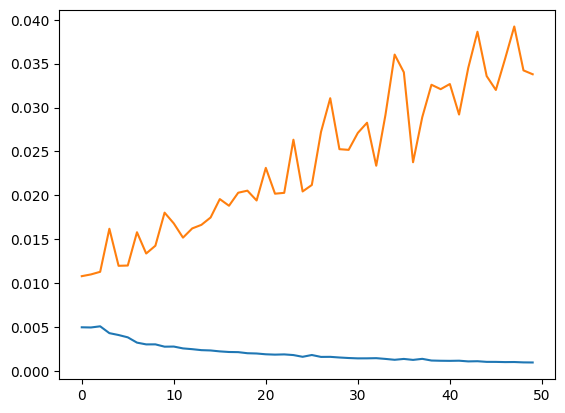

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

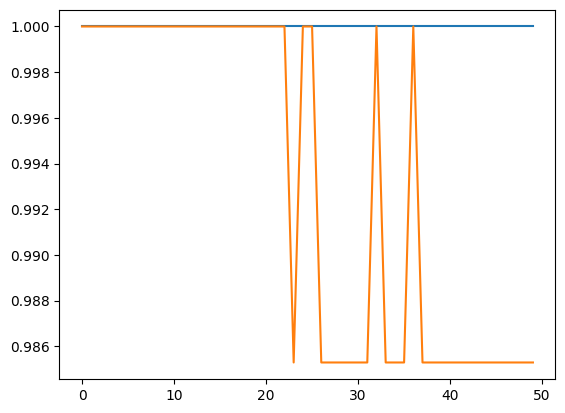

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

#### Chromagrams

In [ ]:
histc = CNN_Model_c.fit(xc_train, yc_train, validation_data=(xc_test, yc_test), epochs = 20)

Epoch 1/20
7/7 [==============================] - 5s 722ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 5s 707ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 5s 681ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 5s 676ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 6s 855ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 5s 649ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 4s 637ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

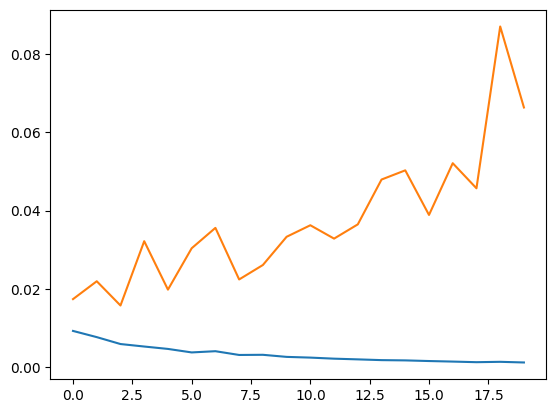

In [ ]:
plt.plot(histc.history['loss'])
plt.plot(histc.history['val_loss'])

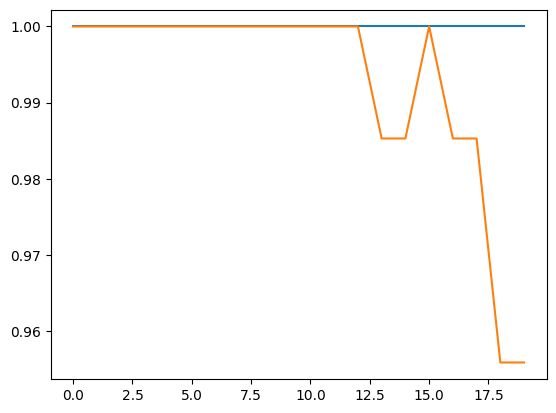

In [ ]:
plt.plot(histc.history['accuracy'])
plt.plot(histc.history['val_accuracy'])